# Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 150)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Glimpse of Data

In [4]:
# Read data
path = '../input/walmart-recruiting-store-sales-forecasting/'

features = pd.read_csv(f'{path}features.csv.zip')
train = pd.read_csv(f'{path}train.csv.zip')
test = pd.read_csv(f'{path}test.csv.zip')
stores = pd.read_csv(f'{path}stores.csv')
sample_submission = pd.read_csv(f'{path}sampleSubmission.csv.zip')

dataset columns values

In [5]:
pd.DataFrame(features.dtypes, columns=['Type']).T

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Type,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool


In [6]:
pd.DataFrame(train.dtypes, columns=['Type']).T

,Store,Dept,Date,Weekly_Sales,IsHoliday
Type,int64,int64,object,float64,bool


In [7]:
pd.DataFrame(stores.dtypes, columns=['Type']).T

,Store,Type,Size
Type,int64,object,int64


### dataset head

In [8]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
%%time
features.describe()

CPU times: user 33.2 ms, sys: 1.24 ms, total: 34.4 ms
Wall time: 40.6 ms


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [10]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
%%time
train.describe()

CPU times: user 39.3 ms, sys: 18.4 ms, total: 57.7 ms
Wall time: 56.9 ms


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [12]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [13]:
%%time
stores.describe()

CPU times: user 9.65 ms, sys: 227 µs, total: 9.88 ms
Wall time: 8.84 ms


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


Pre-Processing

We'll merge data: features and stores have a commom key 'Stores' we can create a new data using the keys 'Store', 'Dept' and 'IsHoliday'. The data will be loaded into 'dataset, dataset_test'.

In [14]:
dataset = train.merge(stores, how='left').merge(features, how='left')
dataset.shape

(421570, 16)

In [15]:
dataset.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [16]:
dataset_test = test.merge(stores, how='left').merge(features, how='left')
dataset_test.shape

(115064, 15)

In [17]:

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.week
dataset['DayOfTheWeek'] = dataset['Date'].dt.dayofweek
dataset['Day'] = pd.to_datetime(dataset['Date']).dt.day
dataset.replace({'A': 1, 'B': 2,'C':3},inplace=True)

dataset_test['Date'] = pd.to_datetime(dataset_test['Date'])
dataset_test['Year'] = pd.to_datetime(dataset_test['Date']).dt.year
dataset_test['Month'] = pd.to_datetime(dataset_test['Date']).dt.month
dataset_test['Week'] = pd.to_datetime(dataset_test['Date']).dt.week
dataset_test['DayOfTheWeek'] = dataset_test['Date'].dt.dayofweek

dataset_test['Day'] = pd.to_datetime(dataset_test['Date']).dt.day
dataset_test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.

### Examine Missing Values
Next we can look at the number and percentage of missing values in each column

In [18]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [19]:
%%time
missing_data(dataset)

CPU times: user 76.4 ms, sys: 1.15 ms, total: 77.5 ms
Wall time: 86 ms


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
Total,0,0,0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,64.2572,73.611,67.4808,67.9847,64.079,0,0,0,0,0,0,0
Types,int64,int64,datetime64[ns],float64,bool,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64


Handling missing values
> Package called missingno (https://github.com/ResidentMario/missingno) !pip install quilt

Nullity Matrix. The msno.matrix nullity matrix is a data-dense display which lets you quickly visually analyse data completion.


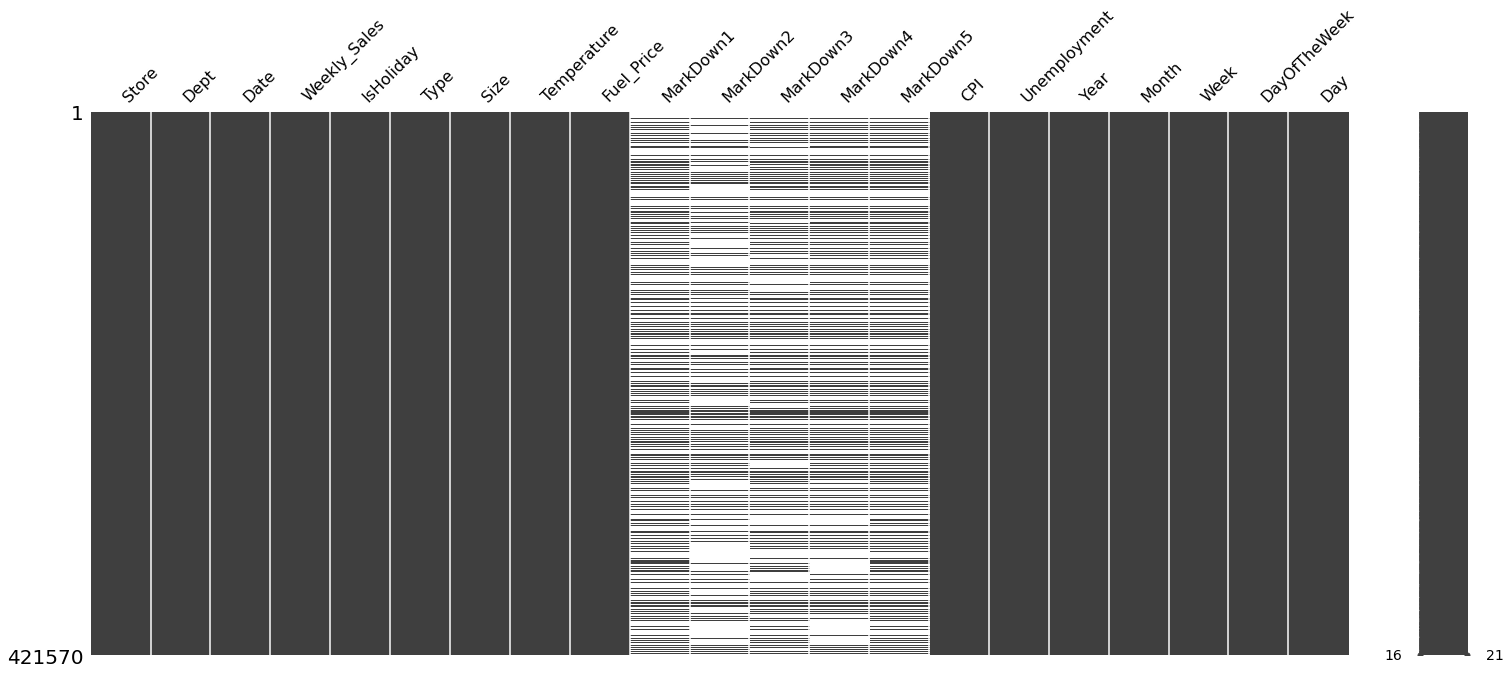

In [20]:
import missingno as msno
msno.matrix(dataset)

Heatmap. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

CPU times: user 244 ms, sys: 45 ms, total: 289 ms
Wall time: 291 ms


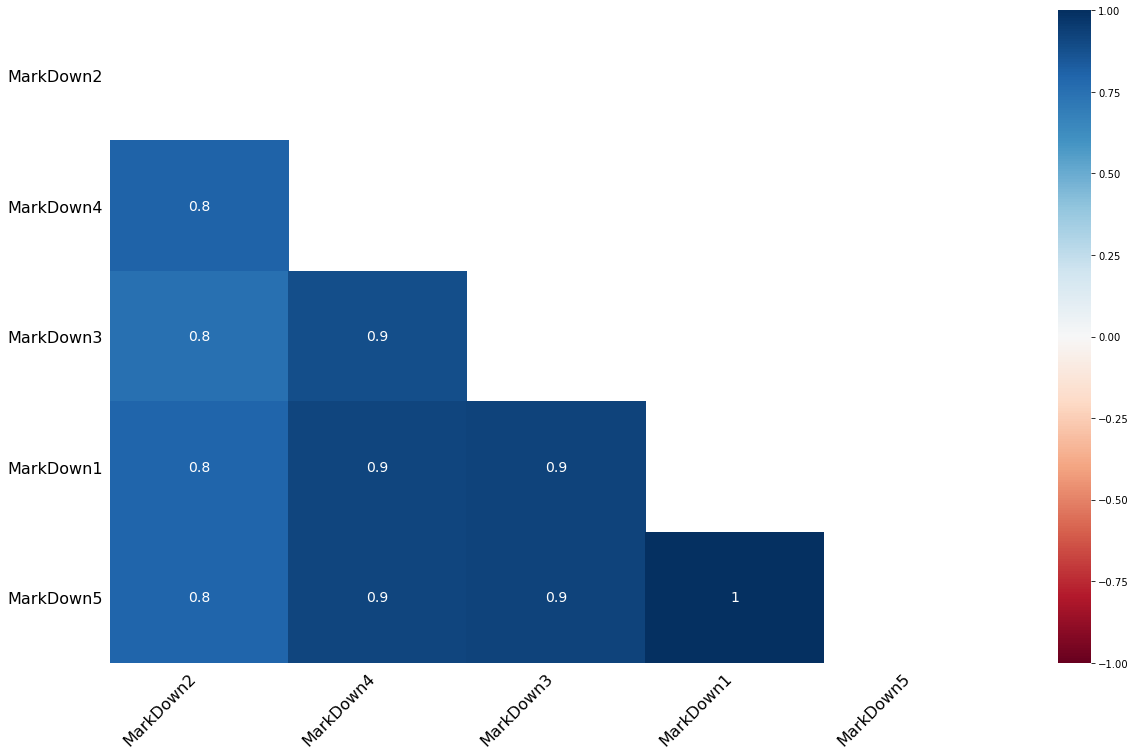

In [21]:
%%time
a = msno.heatmap(dataset, sort='ascending')
a

### Column Types

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either [discrete or continuous](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)). object columns contain strings and are [categorical features](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data).

In [22]:
# Number of each type of column
dataset.dtypes.value_counts()

float64           10
int64              9
bool               1
datetime64[ns]     1
dtype: int64

Number of unique classes in each object column

In [23]:
# Number of unique classes in each object column
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

# Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent are](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf):

- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

CPU times: user 1.74 s, sys: 177 ms, total: 1.92 s
Wall time: 1.92 s


Text(0.5, 1.0, 'Clustermap')

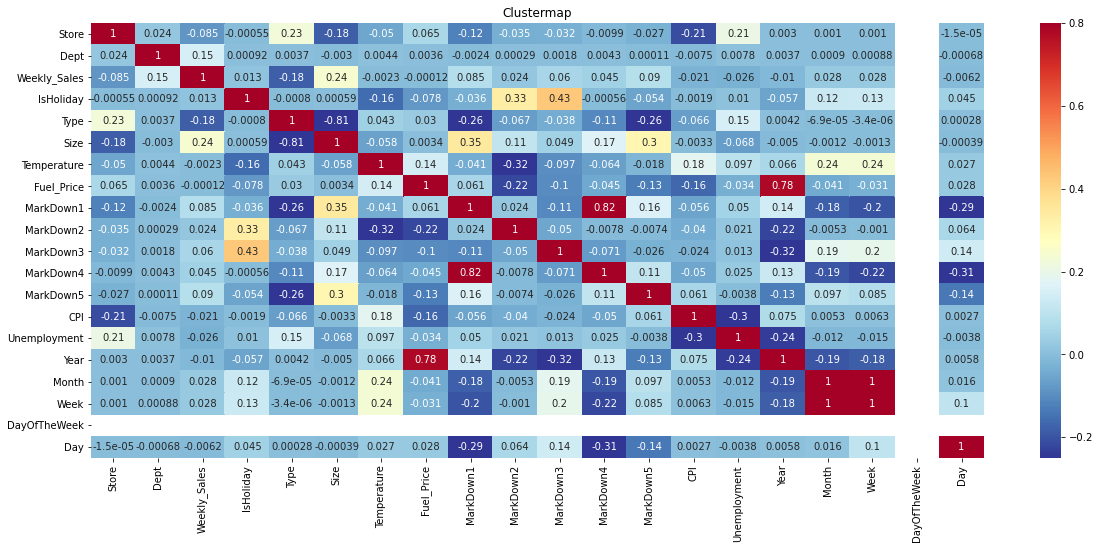

In [24]:
%%time
corrs = dataset.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)
plt.title('Clustermap');

We calculate now the correlations between the features in dataset. The following table shows the first 15 the least correlated features.

In [25]:
%%time
features = dataset.columns.values
corrs_ = dataset[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs_ = corrs_[corrs_['level_0'] != corrs_['level_1']]
corrs_.head(15).T

CPU times: user 1.43 s, sys: 208 ms, total: 1.64 s
Wall time: 1.64 s


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
level_0,Type,Week,Day,Store,Type,Month,MarkDown5,Dept,Fuel_Price,Weekly_Sales,Type,Day,MarkDown2,Dept,Day
level_1,Week,Type,Store,Day,Month,Type,Dept,MarkDown5,Weekly_Sales,Fuel_Price,Day,Type,Dept,MarkDown2,Size
0,3.41649e-06,3.41649e-06,1.47565e-05,1.47565e-05,6.94076e-05,6.94076e-05,0.000108599,0.000108599,0.000120296,0.000120296,0.000278832,0.000278832,0.00029049,0.00029049,0.000385566


Let's look to the top 15 most correlated features, besides the same feature pairs.

In [26]:
corrs_.tail(15).T

,384,385,386,387,388,389,390,391,392,393,394,395,396,398,399
level_0,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,DayOfTheWeek,Day
level_1,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day,DayOfTheWeek
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Selection

Find the optimal feature subset using an evaluation measure. The choice of evaluation metric distinguish the three main strategies of feature selection algorithms: the wrapper strategy, the filter strategy, and the embedded strategy

Filter methods:

- information gain
- chi-square test
- correlation coefficient
- variance threshold

Wrapper methods:

- recursive feature elimination
- sequential feature selection algorithms

Embedded methods:

- L1 (LASSO) regularization
- decision tree

In our case, we remove some useless, redundant variables. We will use three methods for feature selection: Remove collinear features, remove features with greater than a threshold percentage of missing values, keep only the most relevant features using feature importances from a model

### Remove Collinear Variables

Collinear variables are those which are highly correlated with one another. These can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set.

guidelines:[Drop Highly Correlated Features](https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/)

In [27]:
# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = dataset.corr().abs()
corr_matrix.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
Store,1.000000,0.024004,0.085195,0.000548,0.226410,0.182881,0.050097,0.065290,0.119588,0.035173,0.031556,0.009941,0.026634,0.211088,0.208552,0.002997,0.001011,0.001031,NaN,0.000015
Dept,0.024004,1.000000,0.148032,0.000916,0.003708,0.002966,0.004437,0.003572,0.002426,0.000290,0.001784,0.004257,0.000109,0.007477,0.007837,0.003738,0.000904,0.000882,NaN,0.000678
Weekly_Sales,0.085195,0.148032,1.000000,0.012774,0.182242,0.243828,0.002312,0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,0.020921,0.025864,0.010111,0.028409,0.027673,NaN,0.006187
IsHoliday,0.000548,0.000916,0.012774,1.000000,0.000798,0.000593,0.155949,0.078281,0.035586,0.334818,0.427960,0.000562,0.053719,0.001944,0.010460,0.056746,0.123376,0.128184,NaN,0.045465
Type,0.226410,0.003708,0.182242,0.000798,1.000000,0.811593,0.042981,0.029687,0.257427,0.067034,0.037560,0.108991,0.258835,0.065812,0.148720,0.004208,0.000069,0.000003,NaN,0.000279


In [28]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
Store,NaN,0.024004,0.085195,0.000548,0.226410,0.182881,0.050097,0.065290,0.119588,0.035173,0.031556,0.009941,0.026634,0.211088,0.208552,0.002997,0.001011,0.001031,NaN,0.000015
Dept,NaN,NaN,0.148032,0.000916,0.003708,0.002966,0.004437,0.003572,0.002426,0.000290,0.001784,0.004257,0.000109,0.007477,0.007837,0.003738,0.000904,0.000882,NaN,0.000678
Weekly_Sales,NaN,NaN,NaN,0.012774,0.182242,0.243828,0.002312,0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,0.020921,0.025864,0.010111,0.028409,0.027673,NaN,0.006187
IsHoliday,NaN,NaN,NaN,NaN,0.000798,0.000593,0.155949,0.078281,0.035586,0.334818,0.427960,0.000562,0.053719,0.001944,0.010460,0.056746,0.123376,0.128184,NaN,0.045465
Type,NaN,NaN,NaN,NaN,NaN,0.811593,0.042981,0.029687,0.257427,0.067034,0.037560,0.108991,0.258835,0.065812,0.148720,0.004208,0.000069,0.000003,NaN,0.000279


Select columns with correlations above threshold

In [29]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = dataset.drop(columns = to_drop)
print('Data shape: ', dataset.shape)
print('Size of the data', dataset.shape)

There are 1 columns to remove.
Data shape:  (421570, 20)
Size of the data (421570, 20)


Applying this on the entire dataset results in 64 collinear features removed.

In [30]:
to_drop

['Week']

### Remove Missing Values

In this implementation, if any columns have greater than 85% missing values, they will be removed.

guidelines:[LightGBM Advanced Topics](https://github.com/Microsoft/LightGBM/blob/master/docs/Advanced-Topics.rst)

In [31]:
## Dataset missing values (in percent)
dataset_missing = (dataset.isnull().sum() / len(dataset)).sort_values(ascending = False)
dataset_missing.head()

MarkDown2    0.736110
MarkDown4    0.679847
MarkDown3    0.674808
MarkDown1    0.642572
MarkDown5    0.640790
dtype: float64

In [32]:
# Identify missing values above threshold
dataset_missing_ = dataset_missing.index[dataset_missing > 0.90]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 90%% missing values' % len(all_missing))
dataset = dataset.drop(columns = all_missing)
print('Data shape: ', dataset.shape)

There are 0 columns with more than 90% missing values
Data shape:  (421570, 20)


# Feature Selection through Feature Importances

> We want to see mos important features

In [33]:
import xgboost as xgb

train_y = dataset['Weekly_Sales']
train_X = dataset.drop(["Weekly_Sales", "Date"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

[20:13:44] WARNING: /workspace/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:44] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:14:16] WARNING: /workspace/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


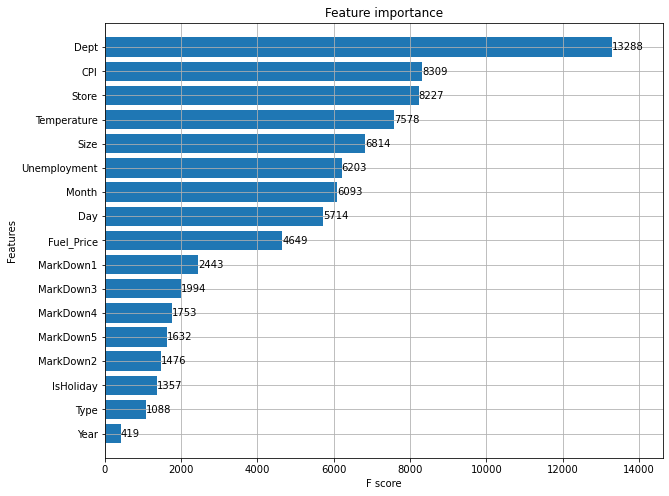

In [34]:
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99

fig, ax = plt.subplots(figsize=(10,8))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()

# Outlier Analysis

The day of the week with Monday=0, Sunday=6.

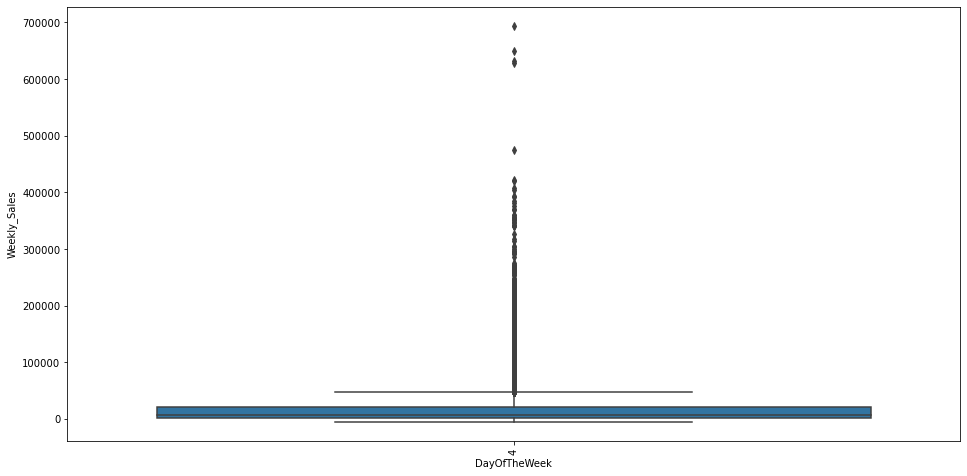

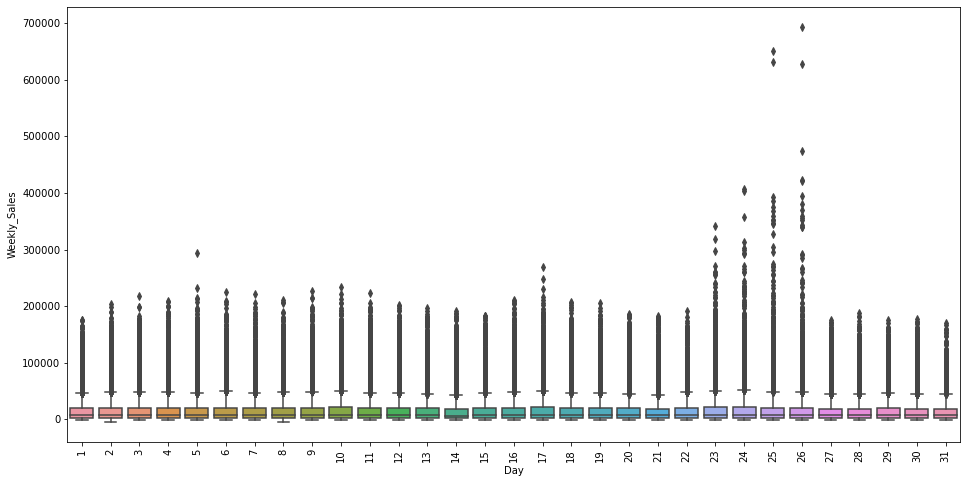

In [35]:
def box_plot_dist_var(var):
#     var = 'DayOfTheWeek'
    data_ = pd.concat([dataset['Weekly_Sales'], dataset[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="Weekly_Sales", data=data_)
    plt.xticks(rotation=90);

box_plot_dist_var("DayOfTheWeek")        
box_plot_dist_var("Day")    

Final general, some final days a month have hig week sales value

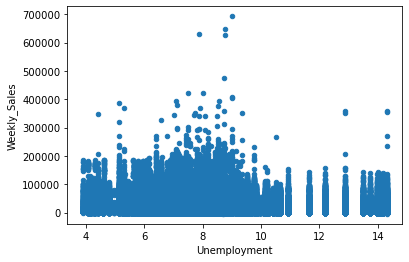

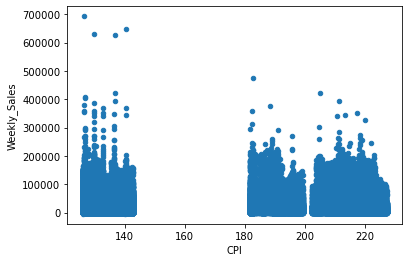

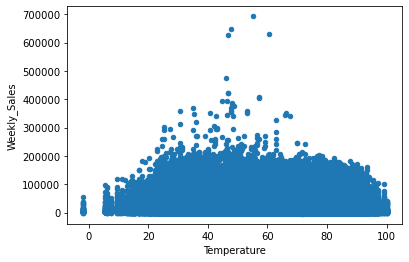

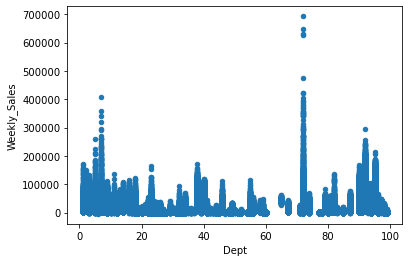

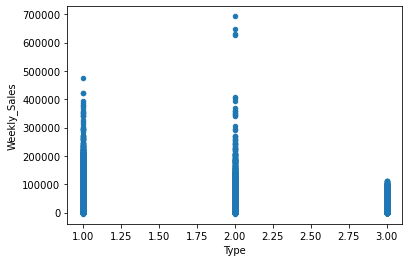

In [36]:
def scatter_plot_var(var):
    data = pd.concat([dataset['Weekly_Sales'],dataset[var] ], axis=1)
    data.plot.scatter(x=var, y='Weekly_Sales')
scatter_plot_var("Unemployment")
scatter_plot_var("CPI")
scatter_plot_var("Temperature")
scatter_plot_var("Dept")
scatter_plot_var("Type")
    


The type 2 have more extreme values,as well as Dept 70, Temperature 50-60.

So, we'll define the extreme values for week sales>=4000000 and see some distributions, peaks in time series.


In [37]:


d_low = dataset[dataset['Weekly_Sales'] < 300000]
d_high = dataset[dataset['Weekly_Sales'] >= 300000]
dataset ['Weekly_Sales_low_high'] = np.where(  dataset['Weekly_Sales']<300000, 0, 1)

In [38]:
def cat_feat_ploting(df, col):
    tmp = pd.crosstab(df[col], df['Weekly_Sales_low_high'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'inline', 1:'Weekly_Sales Low High'}, inplace=True)

    plt.figure(figsize=(14,10))
    plt.suptitle(f'{col} Distributions', fontsize=22)

    plt.subplot(221)
    g = sns.countplot(x=col, data=df, order=tmp[col].values)

    g.set_title(f"{col} Distribution", fontsize=19)
    g.set_xlabel(f"{col} Name", fontsize=17)
    g.set_ylabel("Count", fontsize=17)
    # g.set_ylim(0,500000)
    total = df.shape[0] # arbitrary
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=14) 
    plt.subplot(222)
    g1 = sns.countplot(x=col, hue='Weekly_Sales_low_high', data=df, order=tmp[col].values)
    plt.legend(title='Weekly_Sales Low High', loc='best', labels=['no', 'yes'])
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y='Weekly_Sales Low High', data=tmp, color='black', order=tmp[col].values, legend=False)
    gt.set_ylabel("% of Weekly_Sales_low_high", fontsize=16)

    g1.set_title(f"{col} by Target(Weekly_Sales_low_high)", fontsize=19)
    g1.set_xlabel(f"{col} Name", fontsize=17)
    g1.set_ylabel("Count", fontsize=17)

    plt.subplots_adjust(hspace = 0.4, top = 0.85)

    plt.show()

### Ploting columns with few unique values

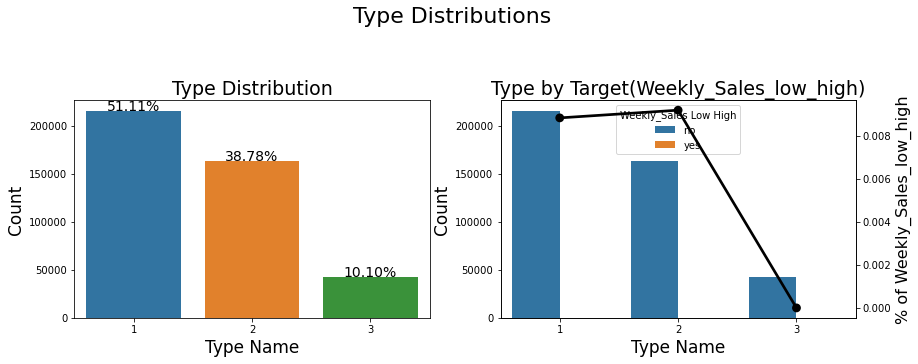

In [39]:
for col in ['Type']:
    dataset[col] = dataset[col].fillna('NaN')
    cat_feat_ploting(dataset, col)

In [40]:
def plot_target_dist(df):
    total = len(df)
    g = sns.countplot(x='Weekly_Sales_low_high', data=df, )
    g.set_title("Weekly Sales  Distribution \n# 0: Low | 1: High #", fontsize=22)
    g.set_ylabel('Count', fontsize=18)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=15) 

def ts_target_lowhigh(df, roh):
    plt.figure(figsize=(16,6))
    df_features = df.sort_index()
    df_low = df_features[df_features['Weekly_Sales'] < roh]['Weekly_Sales']
    df_high = df_features[df_features['Weekly_Sales'] >= roh]['Weekly_Sales']
    plt.plot(df_features['Weekly_Sales'].index, df_features['Weekly_Sales'].fillna(1), c='gray', alpha=0.4)
    plt.scatter(df_low.index, df_low.values, label='LOW', s=10)
    plt.scatter(df_high.index, df_high.values, label='HIGH', c='red', s=10)
    plt.margins(x=0.01,y=0.2)
    plt.title('Weekly_Sales')
    plt.xlabel('Date')
    plt.legend()
    plt.show()


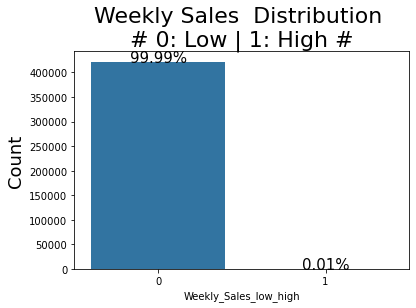

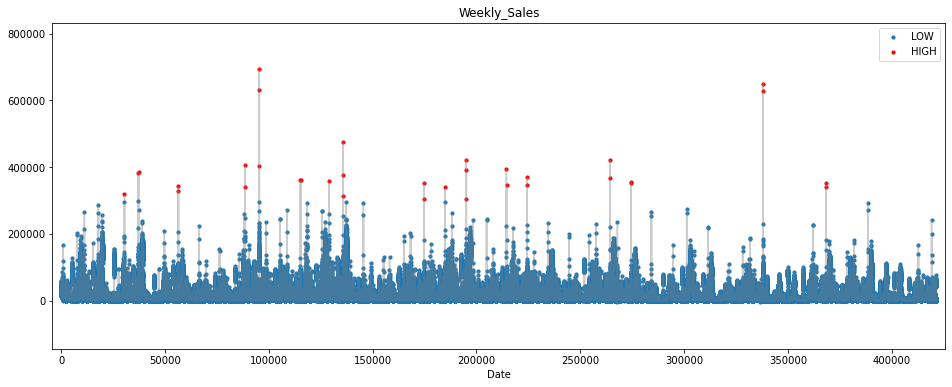

In [41]:
plot_target_dist(dataset)     
ts_target_lowhigh(dataset, 300000)  

We see some a

In [42]:
!pip install change_finder

In [43]:
# coding: utf-8
import change_finder 

def changeFinder(data, r, smooth):
    #CHANGEFINDER PACKAGE
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13,8))
    f.subplots_adjust(hspace=0.4)
    ax1.plot(data)
    ax1.set_title("data count")
    #Initiate changefinder function
    cf = change_finder.ChangeFinder(r=r, k=2, T=smooth, R=2)
    scores = [cf.update(p) for p in data]
    ax2.plot(scores)
    ax2.set_title("Anomaly Score for week")
    plt.show()
    return scores

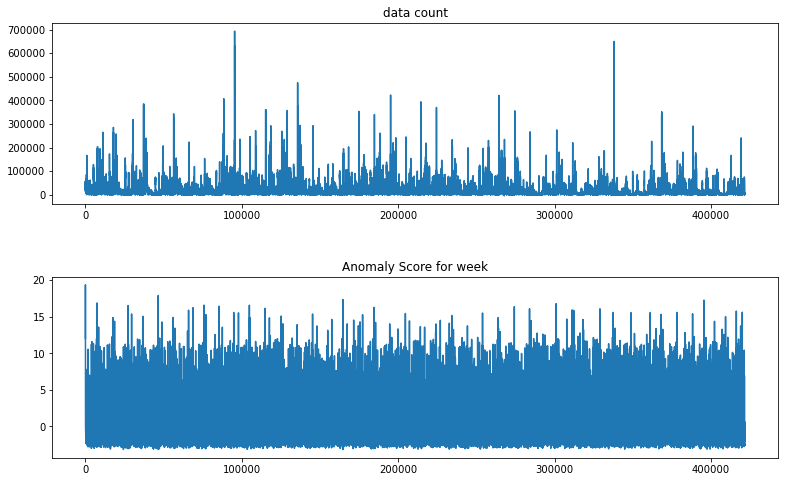

In [44]:
datacf = dataset.Weekly_Sales.values
dataplot1 = changeFinder(datacf, r=0.02, smooth=30)    

### Identifying Week Sales Peaks with Change Finger

In [45]:
dataSF = np.array(dataplot1)
from scipy import stats
describedataSF = stats.describe(dataSF)
describedataSF

DescribeResult(nobs=421570, minmax=(-3.1731271252798425, 19.365457350580986), mean=-1.543899048557325, variance=1.6791353030090541, skewness=4.737637321095543, kurtosis=33.31400063949467)

In [46]:
qt25 = np.percentile(dataSF, 25)  # Q1
qt50 = np.percentile(dataSF, 50)  # Q2
qt60 = np.percentile(dataSF, 60)  # Q31
qt75 = np.percentile(dataSF, 75)  # Q3
qt95 = np.percentile(dataSF, 95)

qt75_ws = np.percentile(datacf, 75)
qt95_ws = np.percentile(datacf, 95)

In [47]:
dfSF = pd.DataFrame(dataSF, columns=['Score_CF'])
dfSF.head()

,Score_CF
0,12.034480
1,19.365457
2,10.200971
3,5.245432
4,4.529351


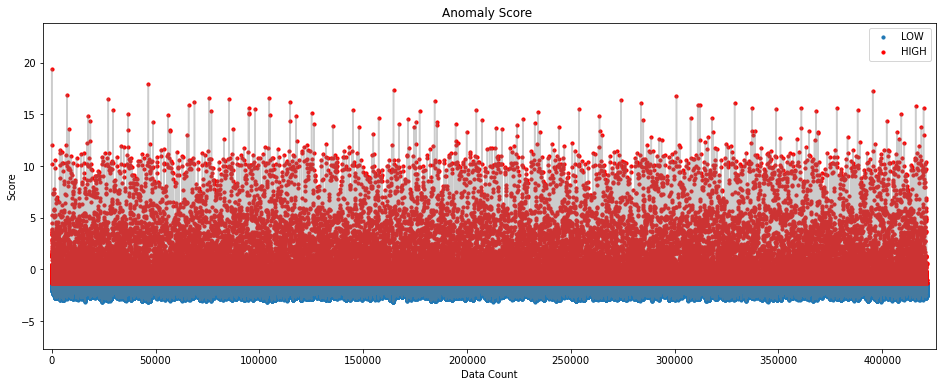

In [48]:
plt.figure(figsize=(16,6))
df_high_data_ = dfSF[dfSF <= qt75]
df_high_score_ = dfSF[dfSF > qt75]
plt.plot(dfSF.index, dfSF.Score_CF.fillna(1), c='gray', alpha=0.4)
plt.scatter(df_high_data_.index, df_high_data_.values, label='LOW', s=10)
plt.scatter(df_high_score_.index, df_high_score_.values, label='HIGH', c='red', s=10)
plt.margins(x=0.01,y=0.2)
plt.title('Anomaly Score ')
plt.ylabel('Score')
plt.xlabel('Data Count')
plt.legend()
plt.show()

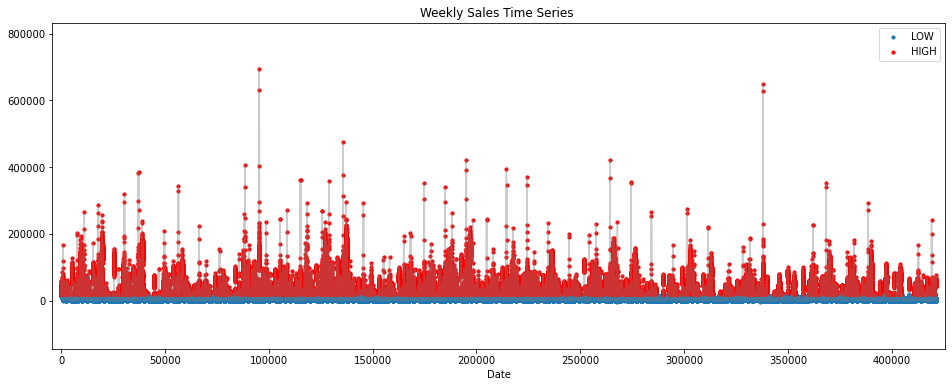

In [49]:
plt.figure(figsize=(16,6))
df_features = dataset.sort_index()
df_high_data = df_features[df_features['Weekly_Sales'] < qt75_ws]['Weekly_Sales']
df_high_score = df_features[df_features['Weekly_Sales'] >= qt75_ws]['Weekly_Sales']
plt.plot(df_features['Weekly_Sales'].index, df_features['Weekly_Sales'].fillna(1), c='gray', alpha=0.4)
plt.scatter(df_high_data.index, df_high_data.values, label='LOW', s=10)
plt.scatter(df_high_score.index, df_high_score.values, label='HIGH', c='red', s=10)
plt.margins(x=0.01,y=0.2)
plt.title('Weekly Sales Time Series ')
plt.xlabel('Date')
plt.legend()
plt.show()

Work in progress

# Visualizations

### plot distribution curves for train and test data

In [50]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(dataset[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(dataset_test[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()

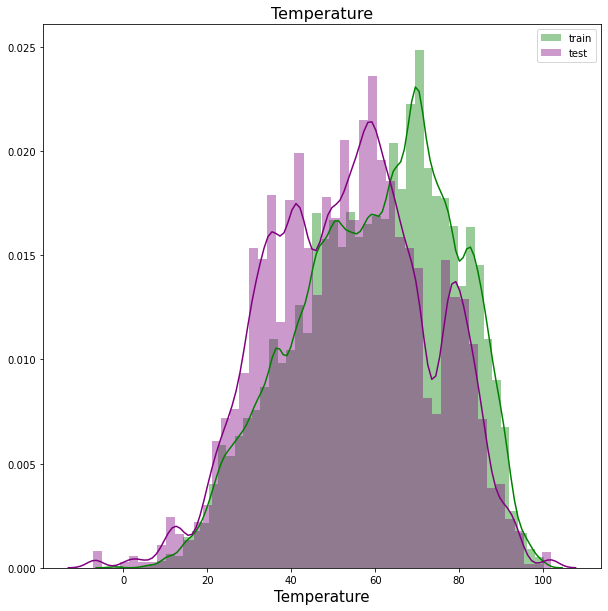

In [51]:
plot_dist_col('Temperature')

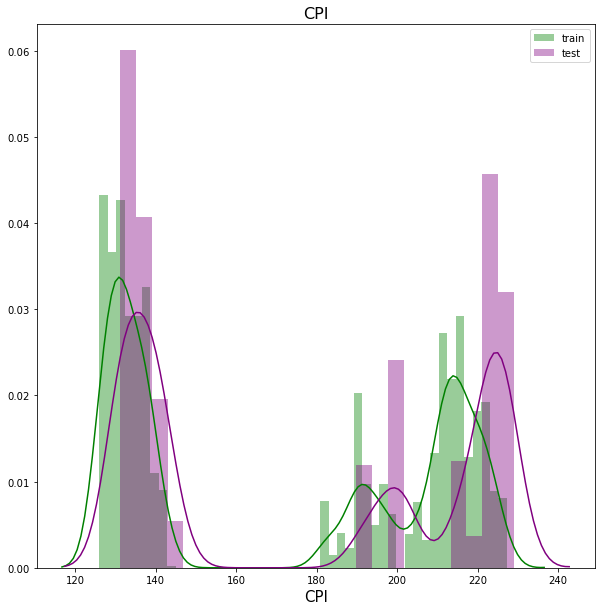

In [52]:
plot_dist_col('CPI')

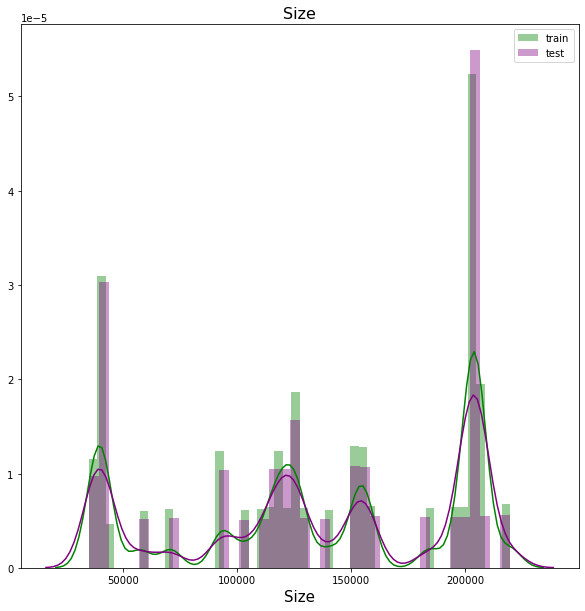

In [53]:
plot_dist_col('Size')

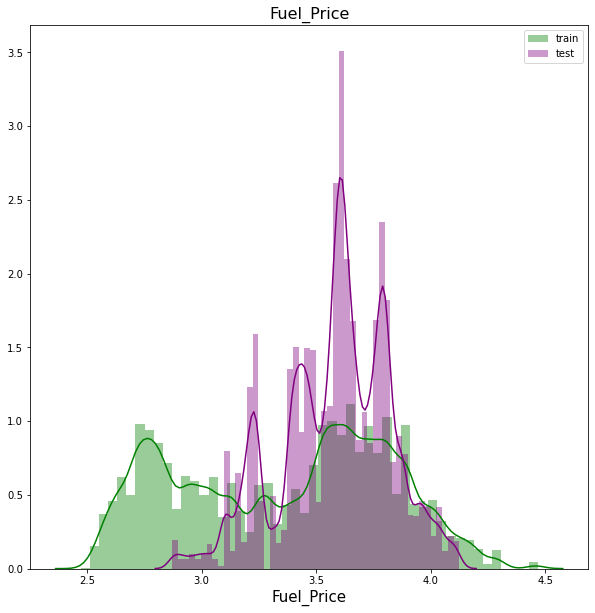

In [54]:
plot_dist_col('Fuel_Price')

The Fuel Price for train, test have diferrent distribuctions.

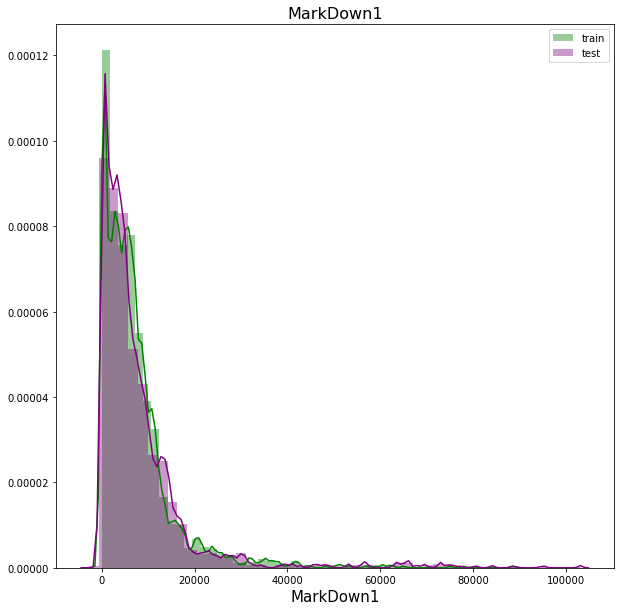

In [55]:
plot_dist_col('MarkDown1')

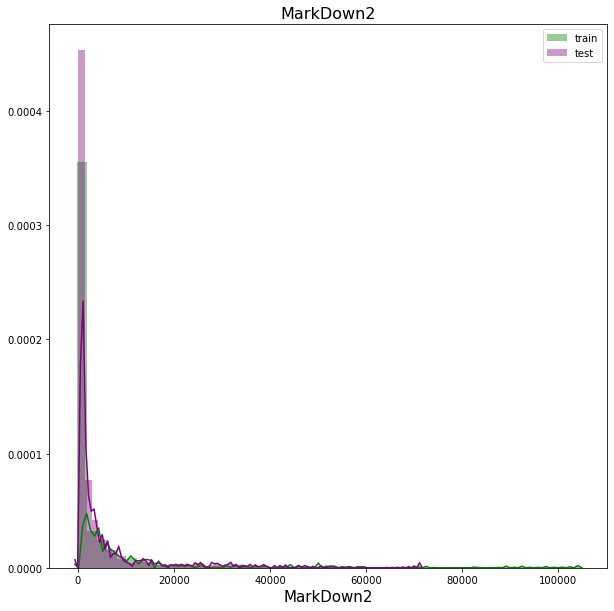

In [56]:
plot_dist_col('MarkDown2')

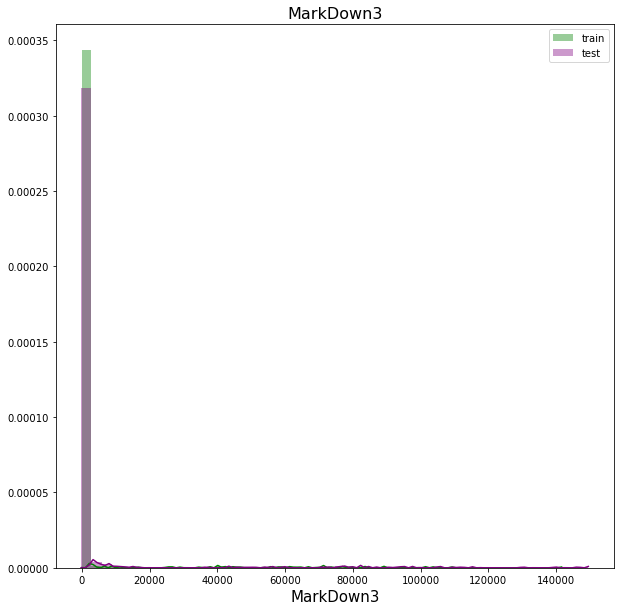

In [57]:
plot_dist_col('MarkDown3')

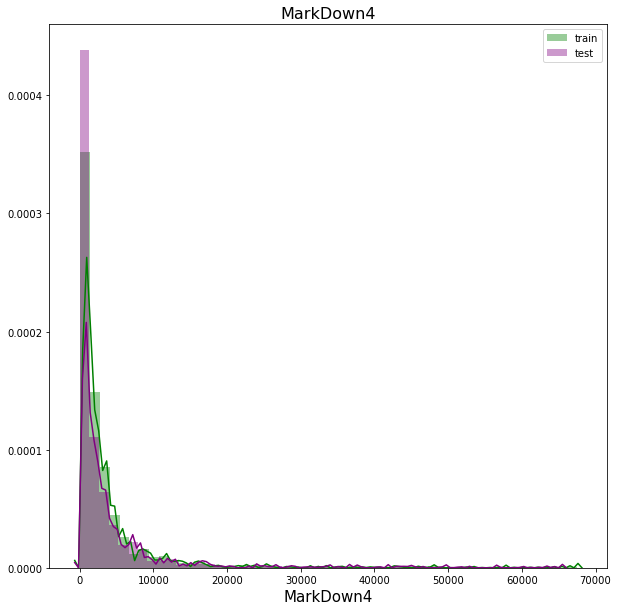

In [58]:
plot_dist_col('MarkDown4')

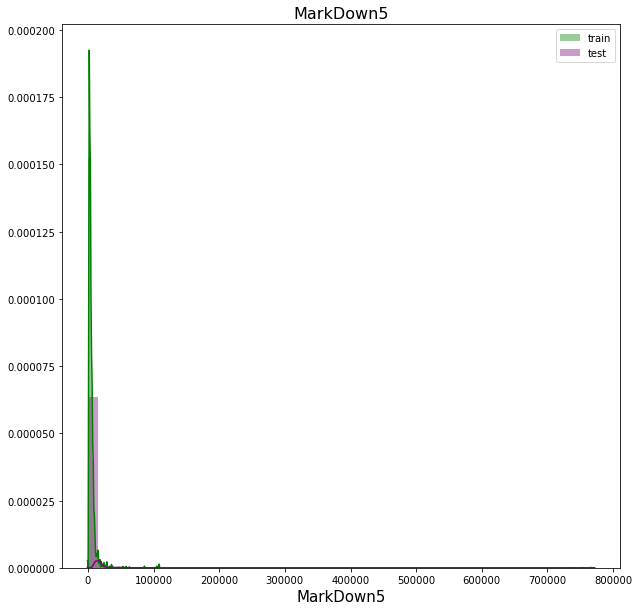

In [59]:
plot_dist_col('MarkDown5')

### Plot peaks sales for each Dept.
> Remember Weekly_Sales_low_high have sales values > 30000.

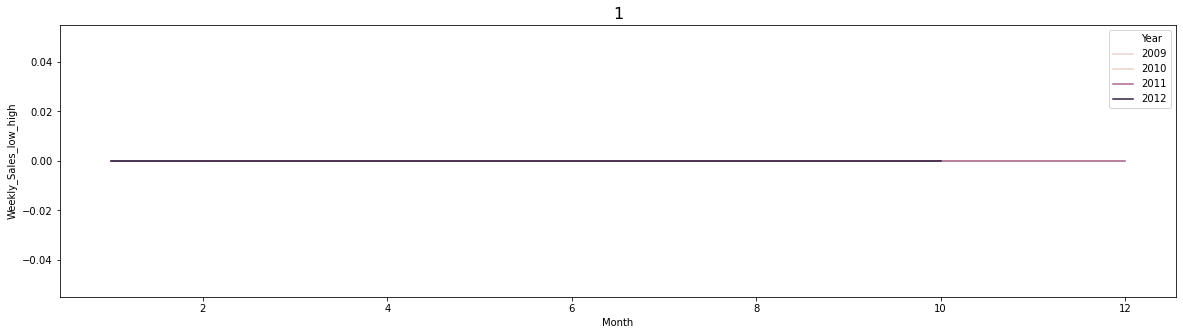

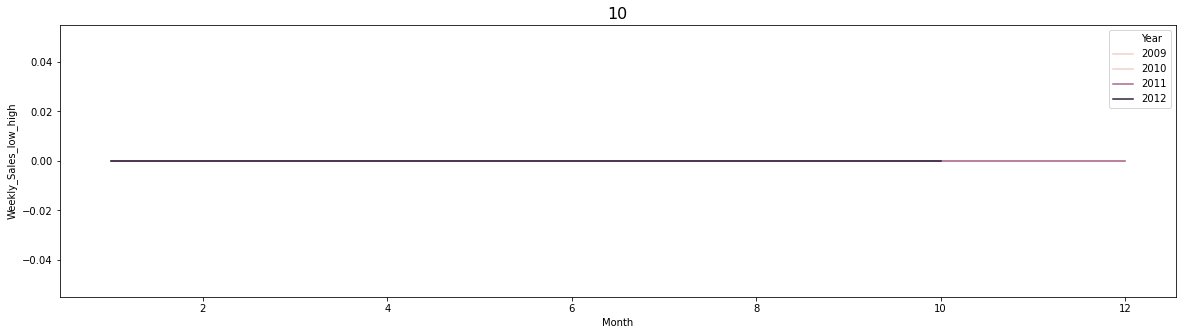

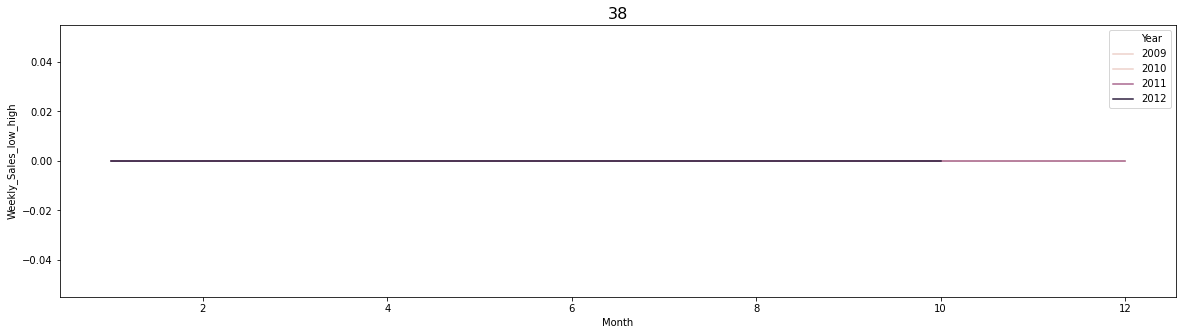

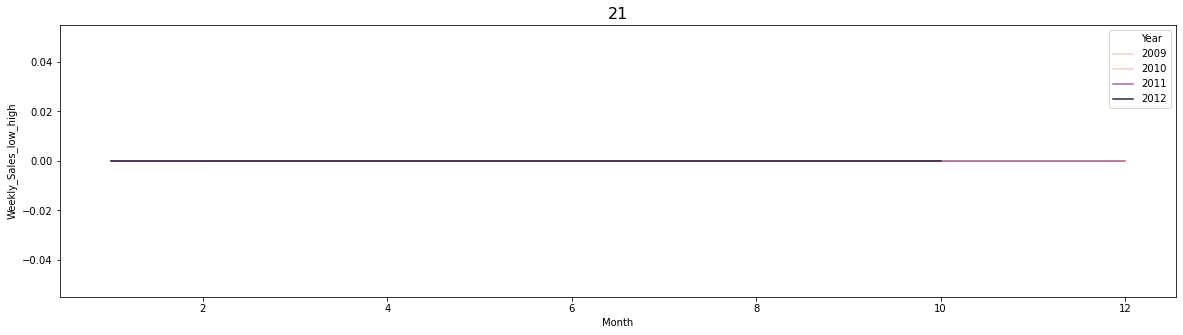

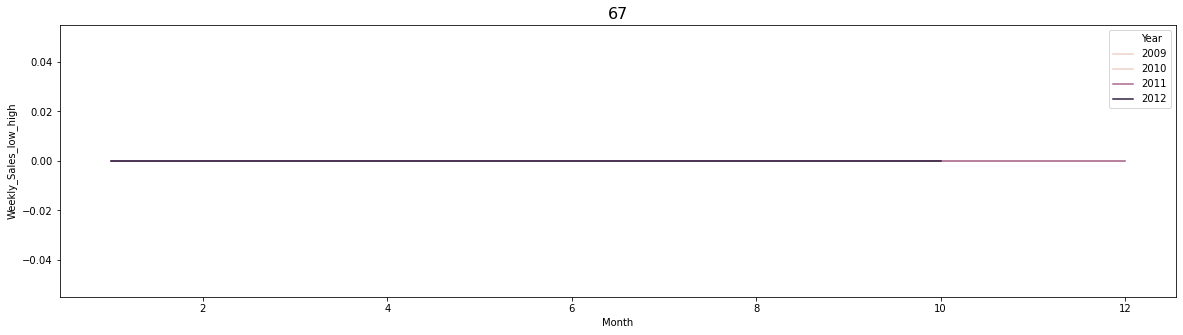

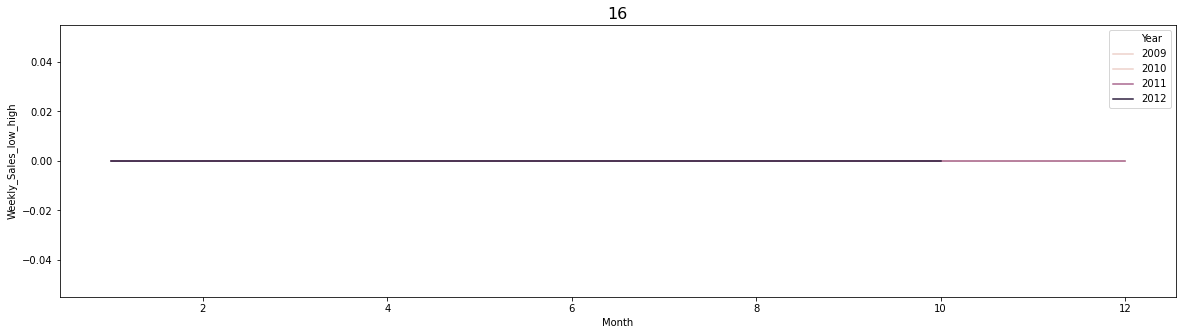

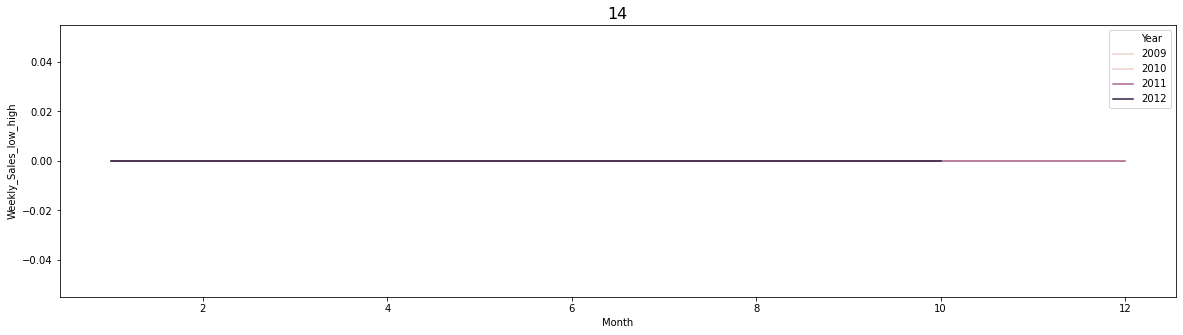

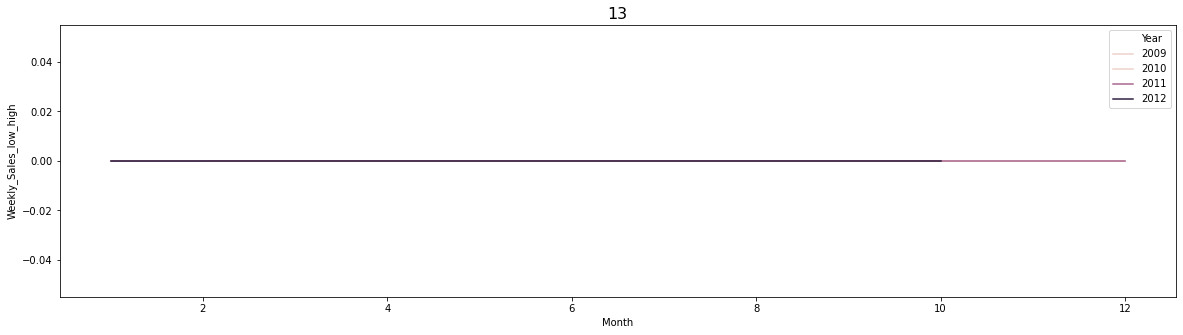

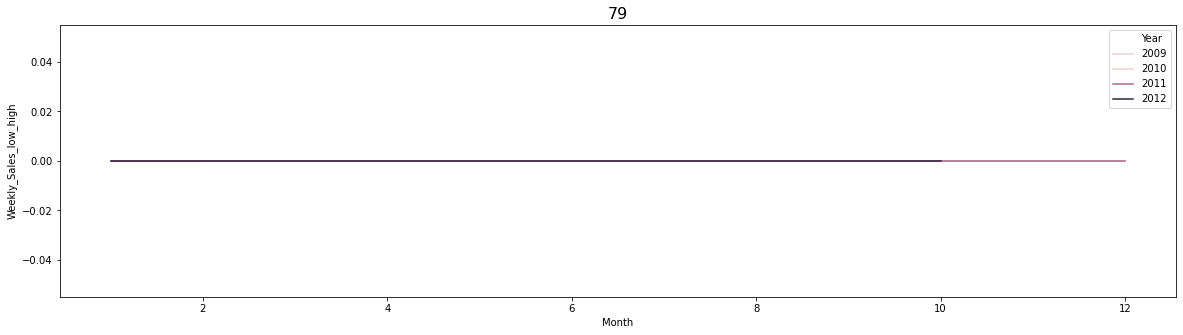

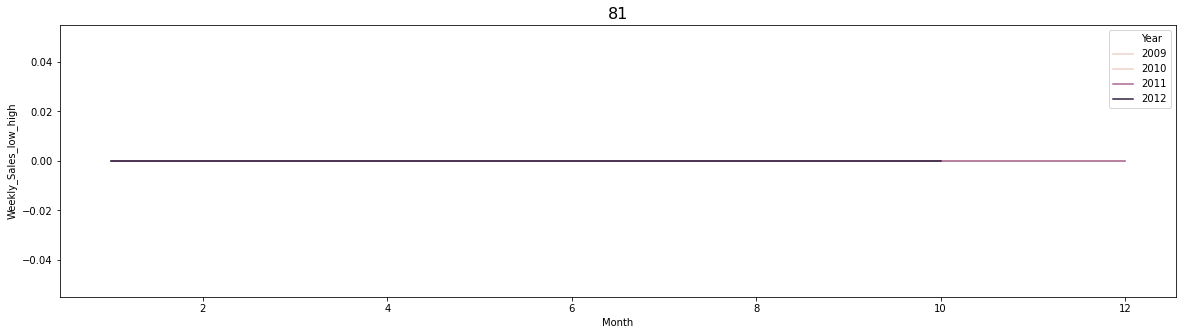

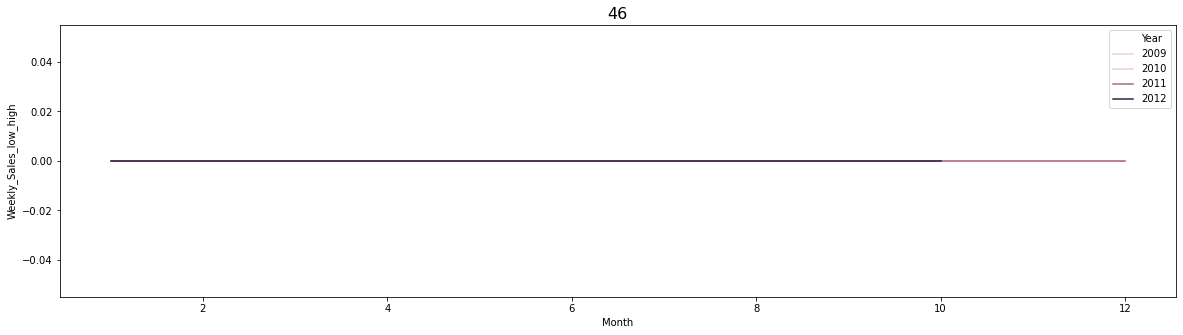

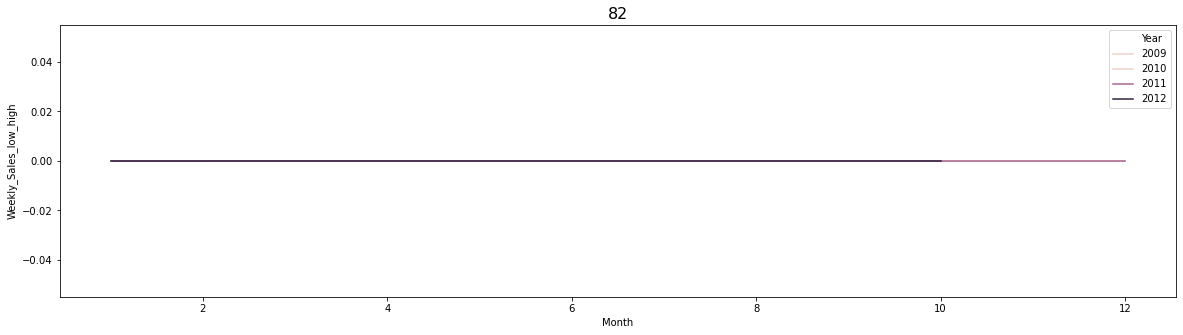

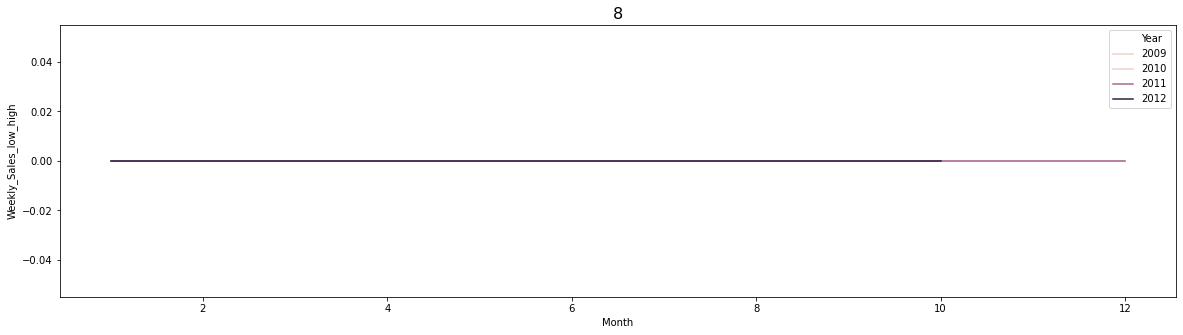

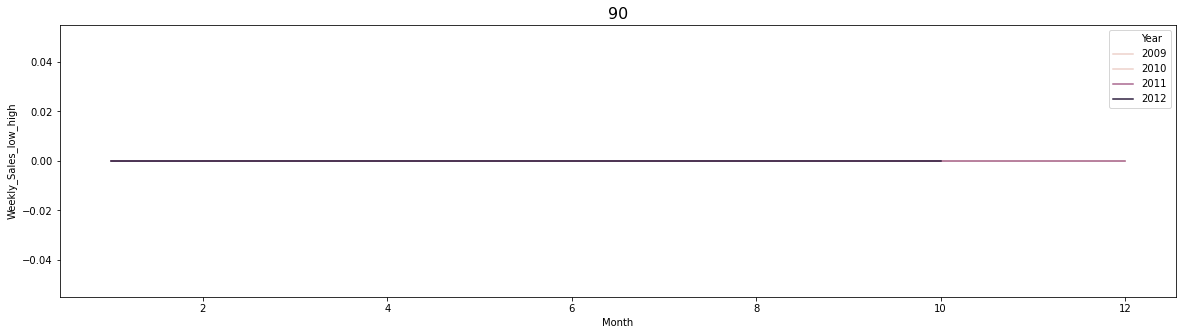

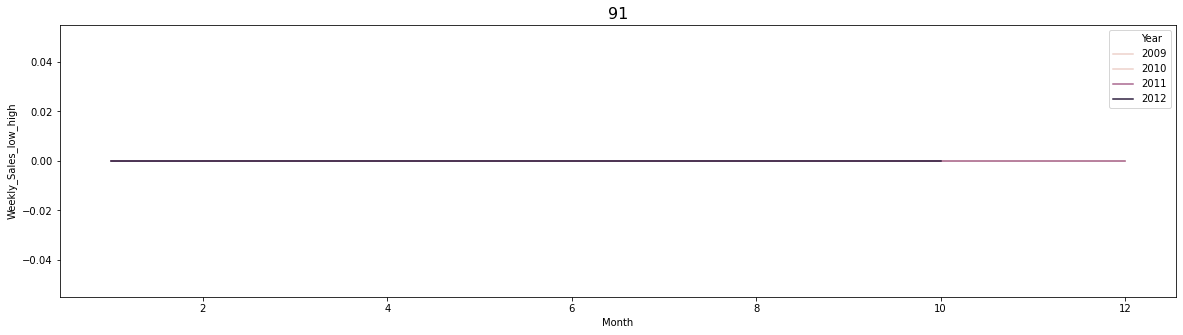

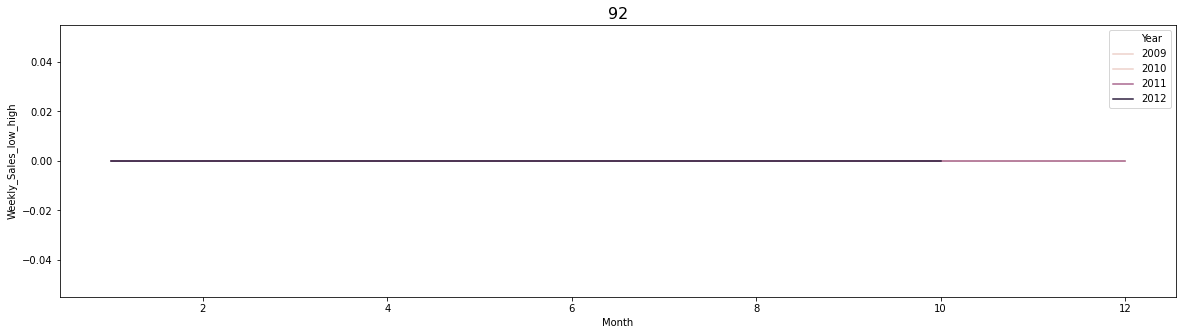

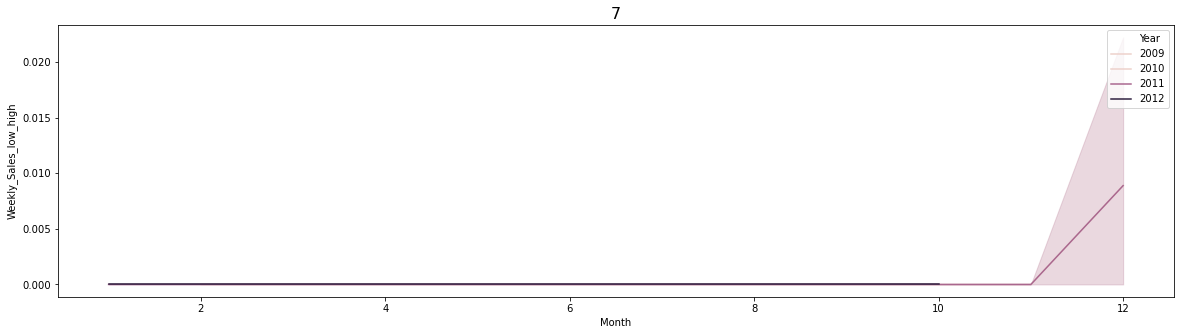

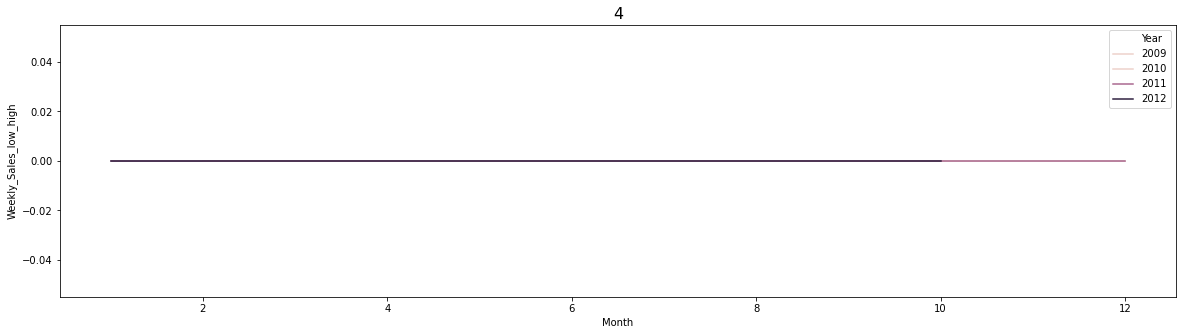

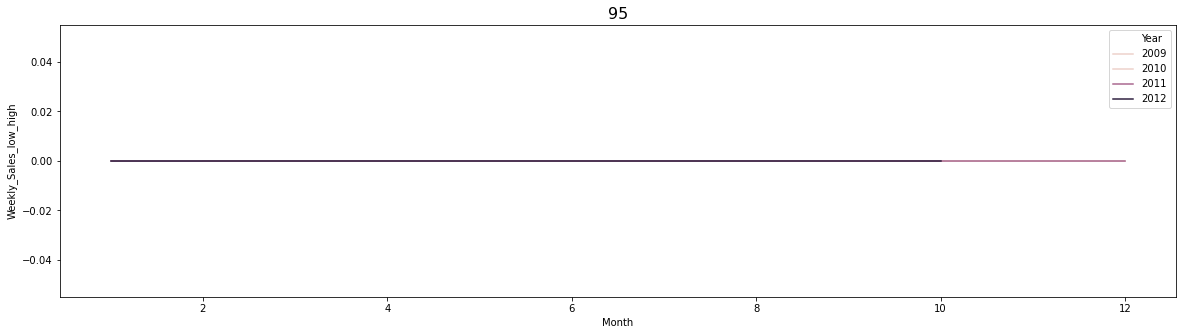

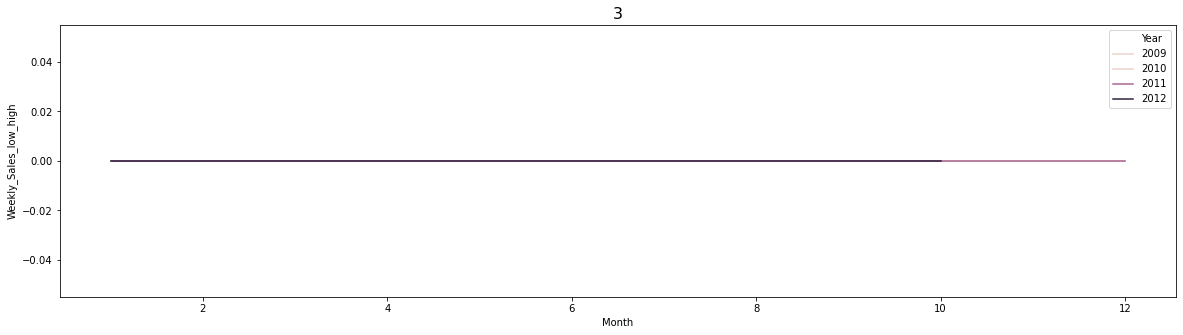

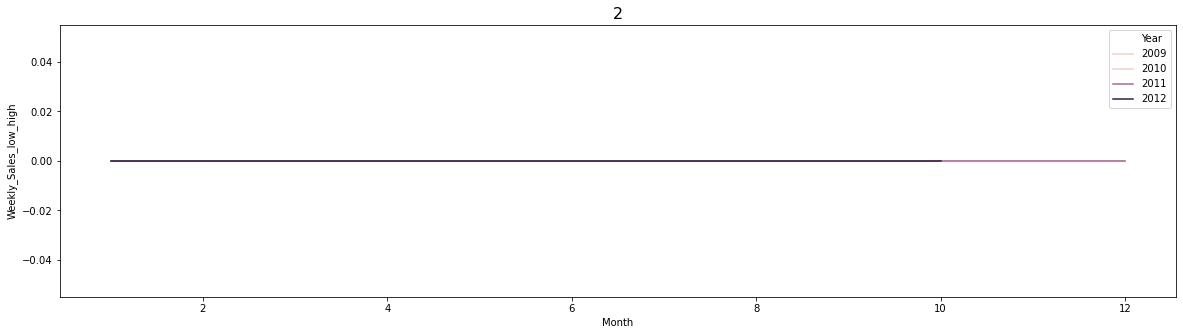

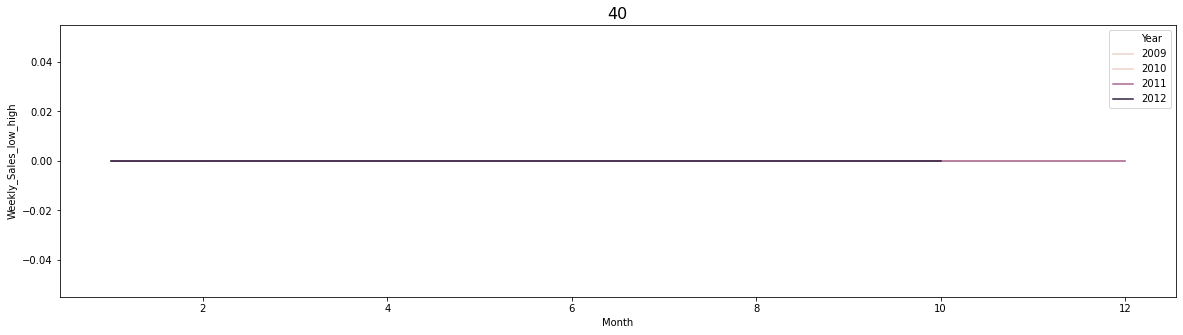

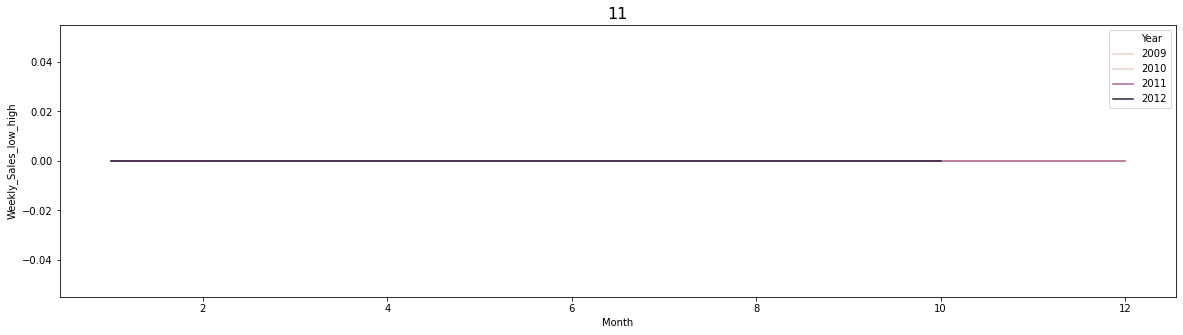

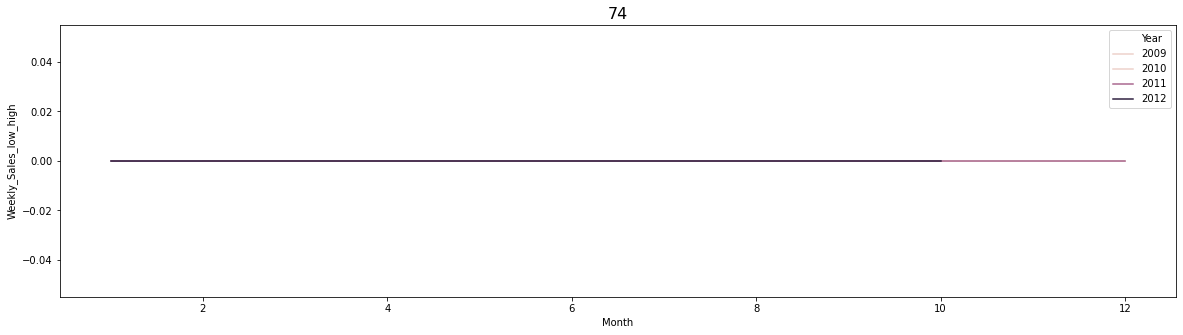

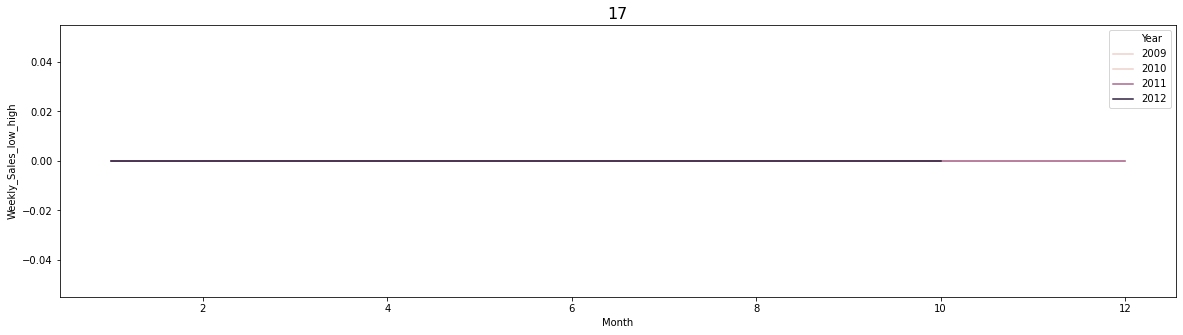

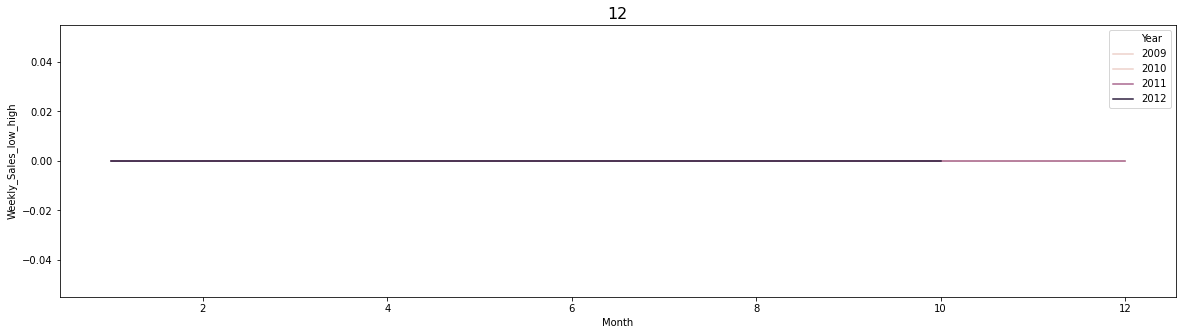

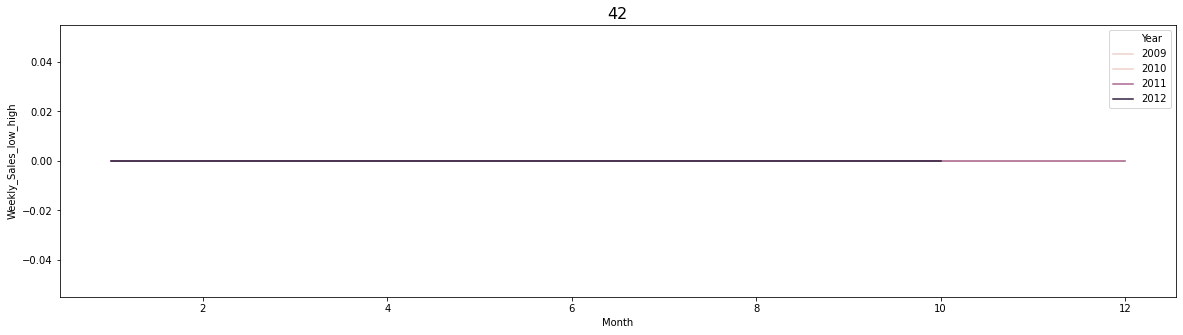

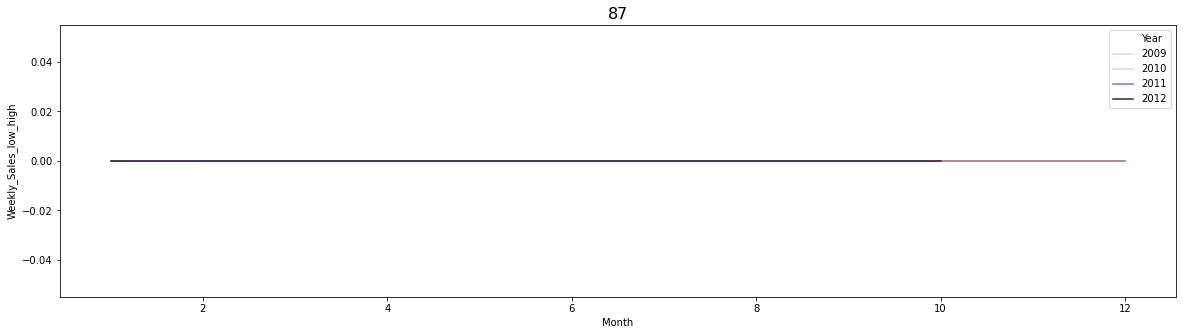

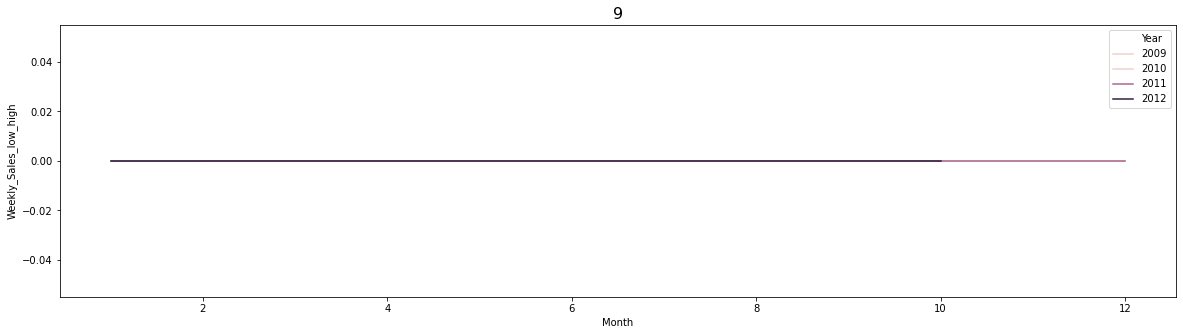

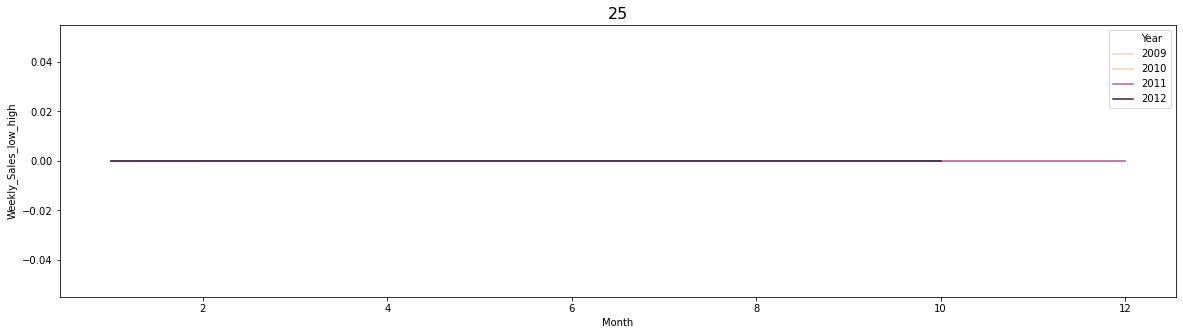

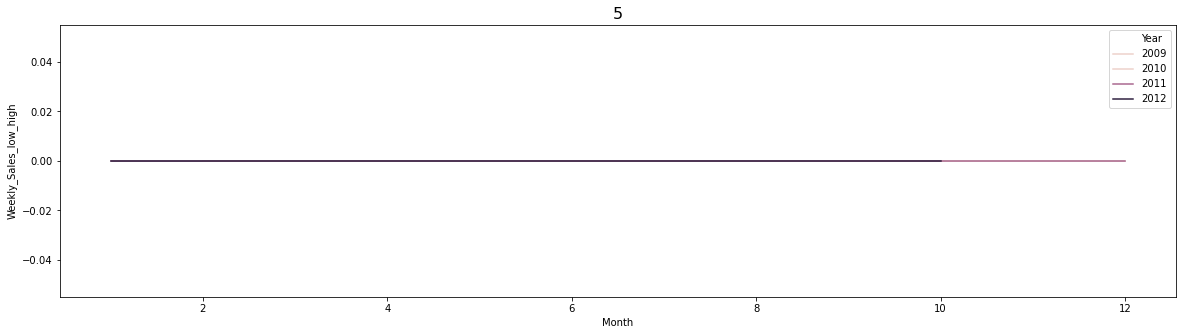

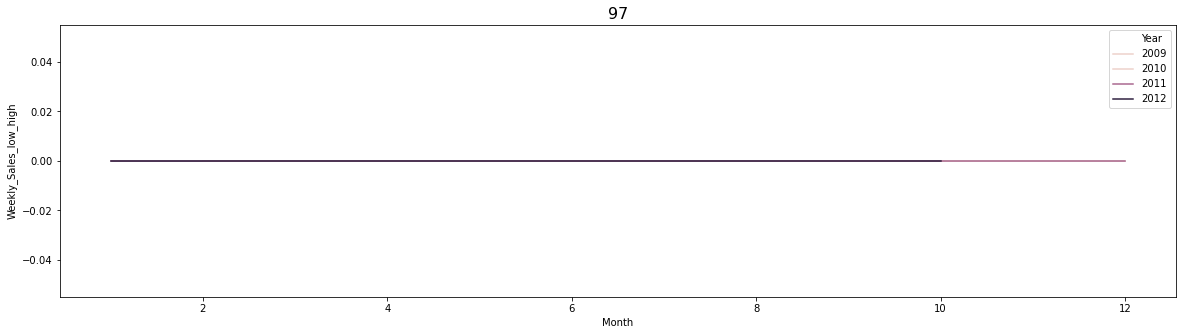

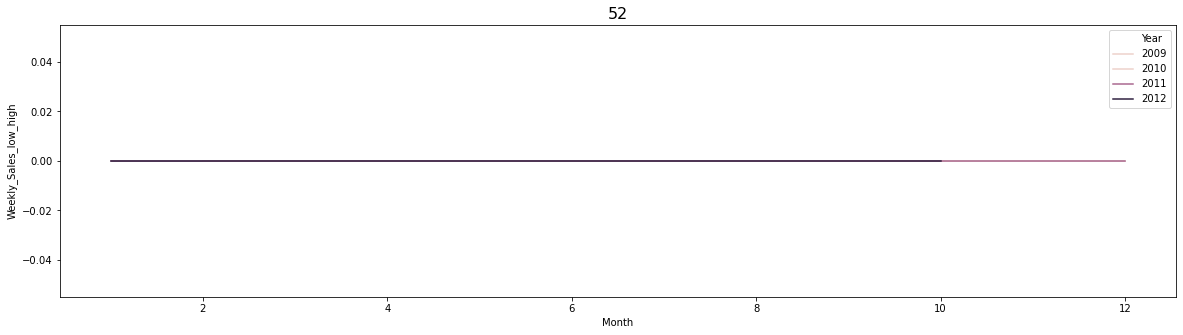

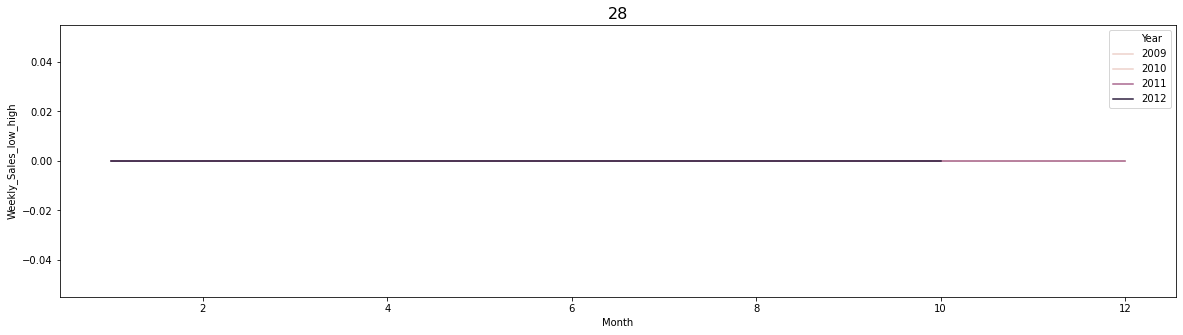

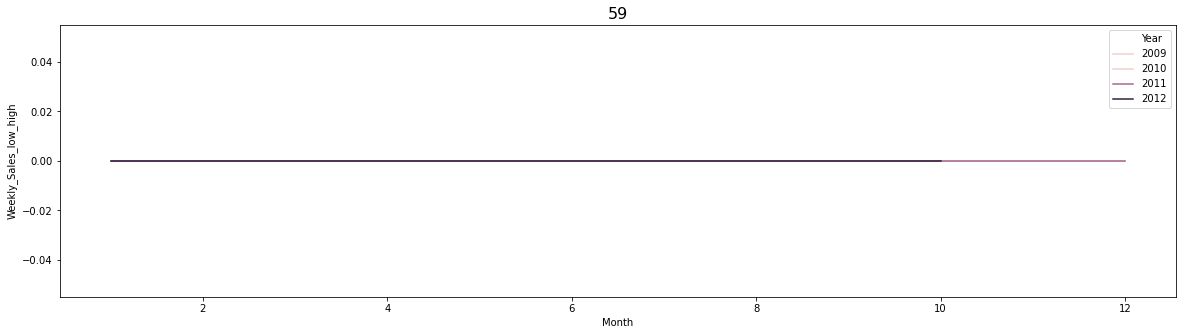

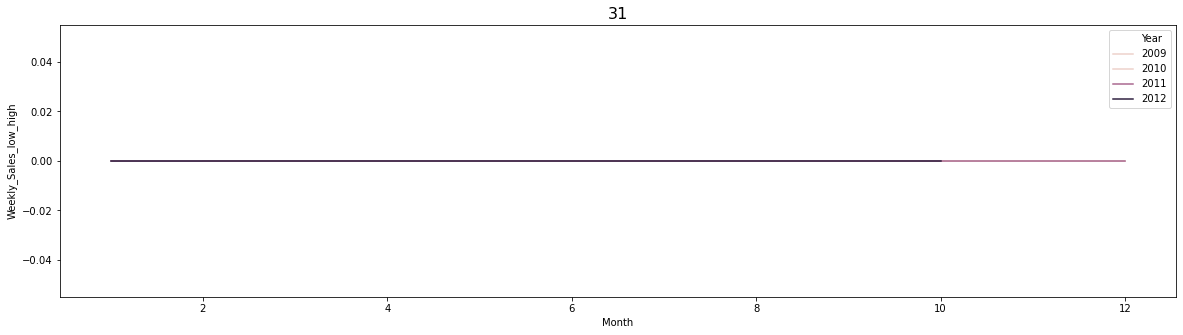

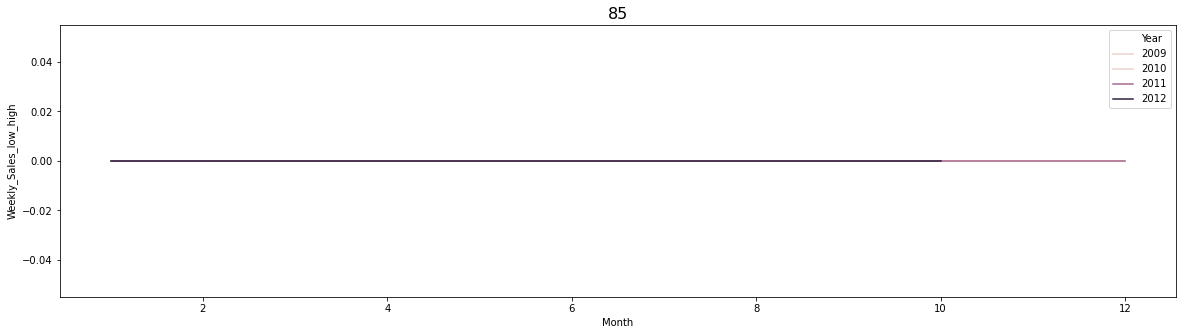

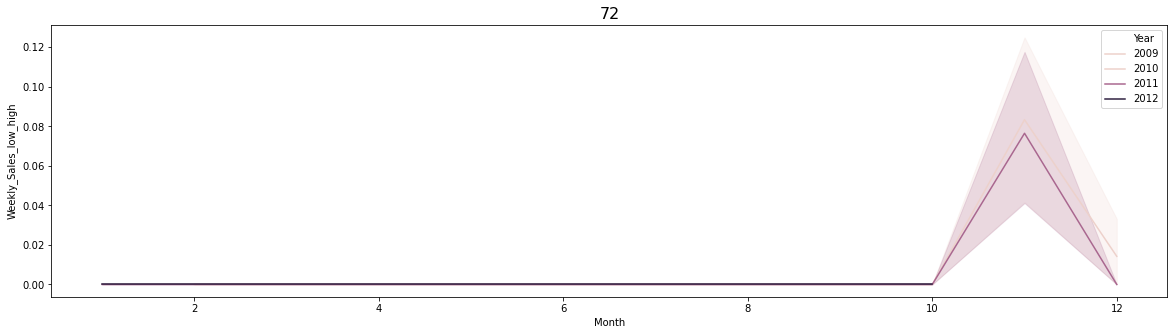

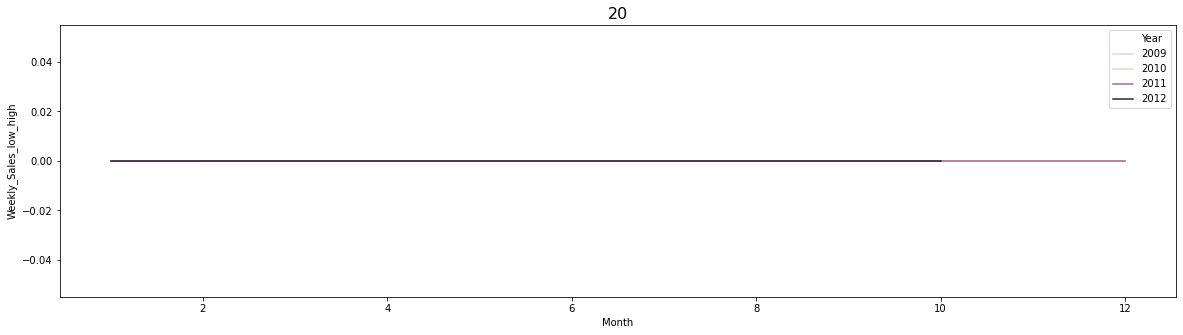

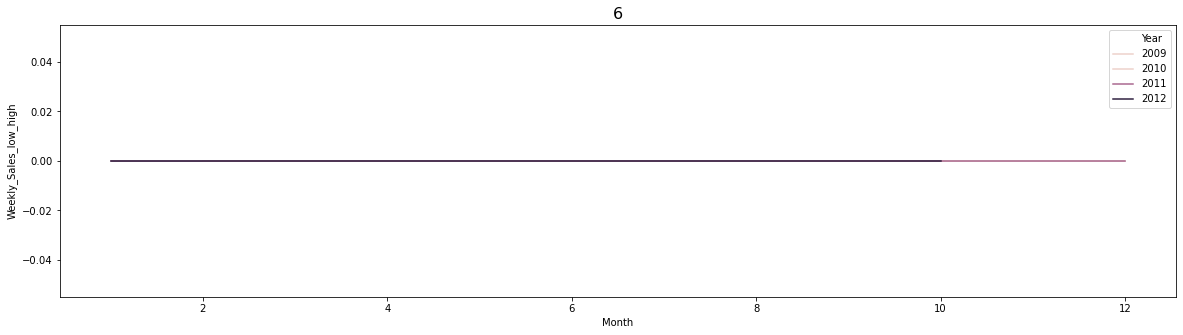

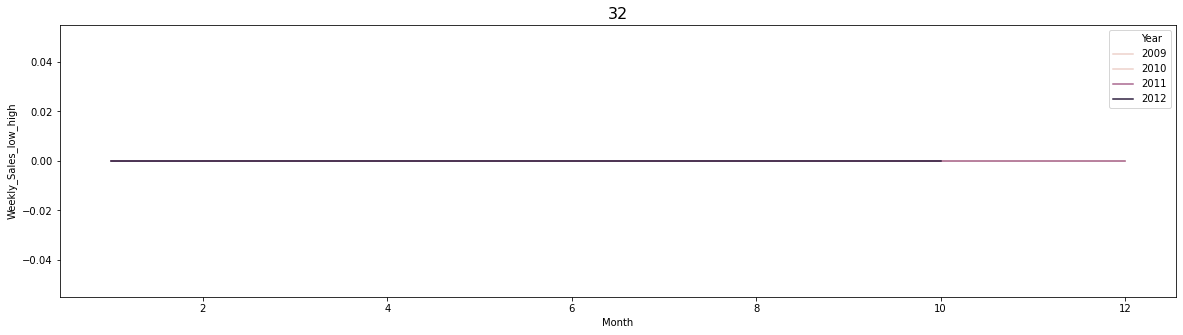

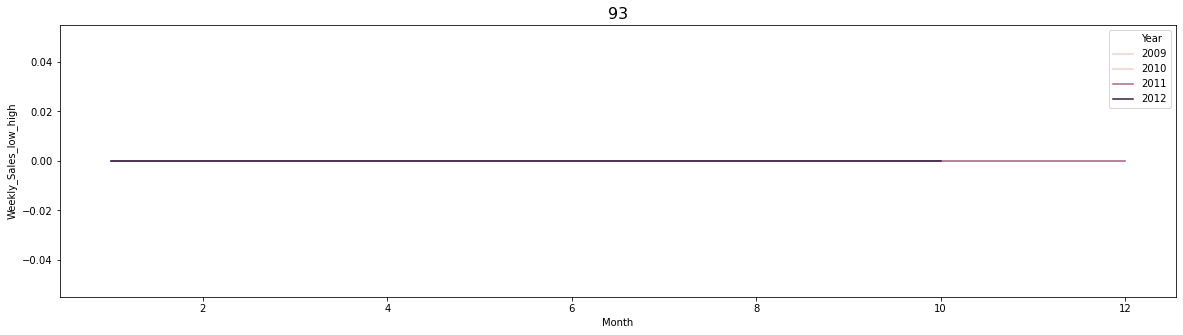

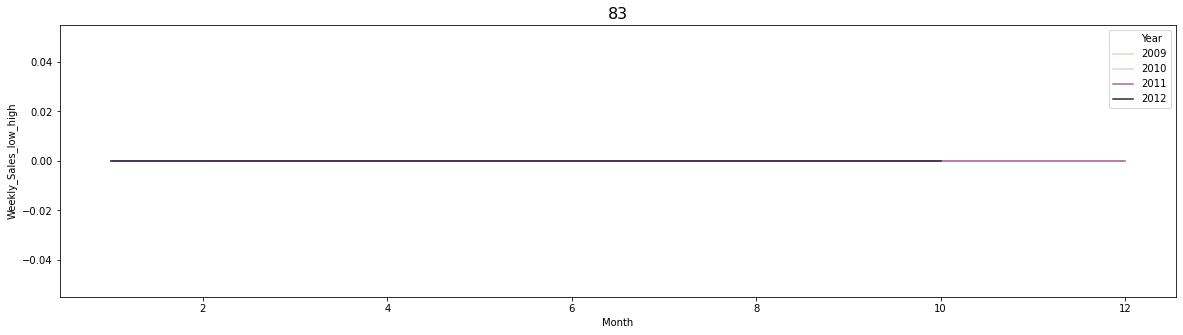

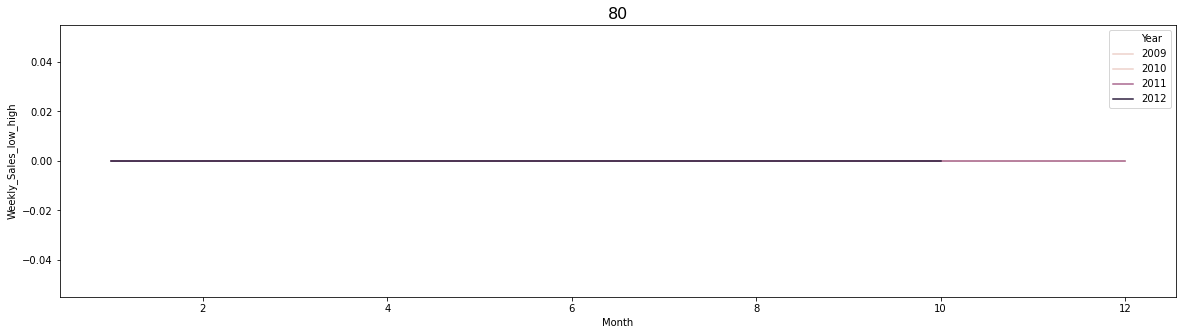

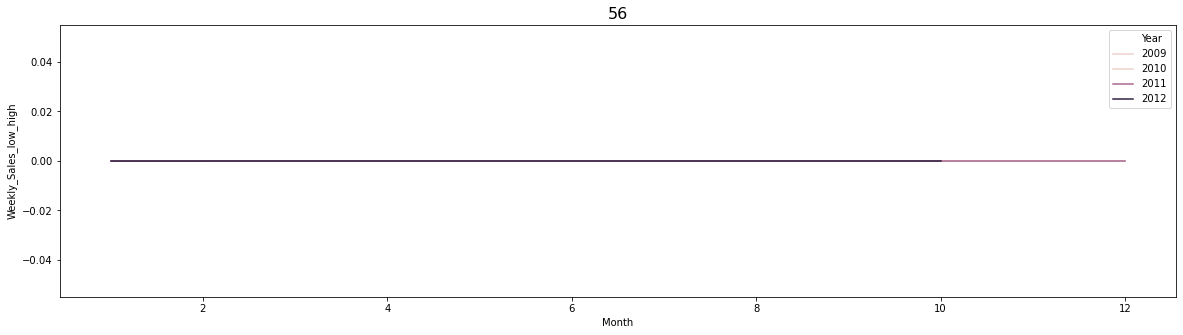

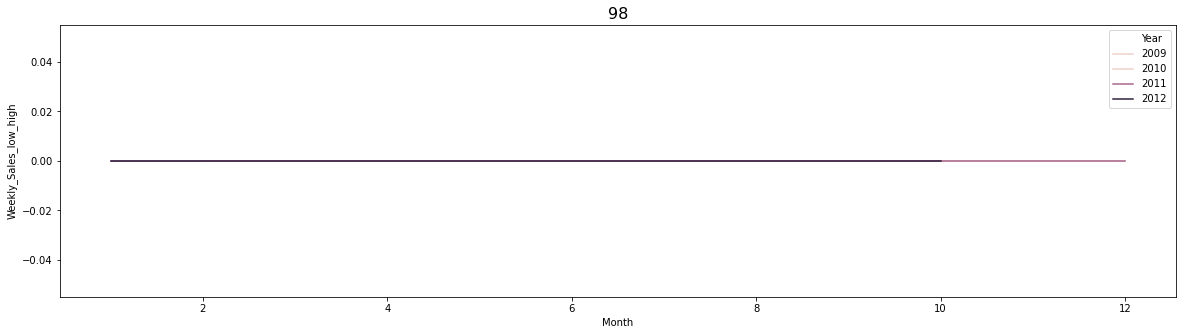

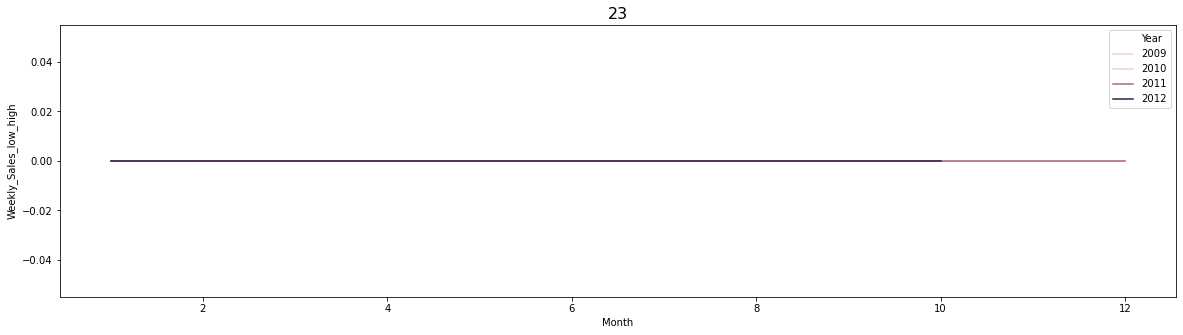

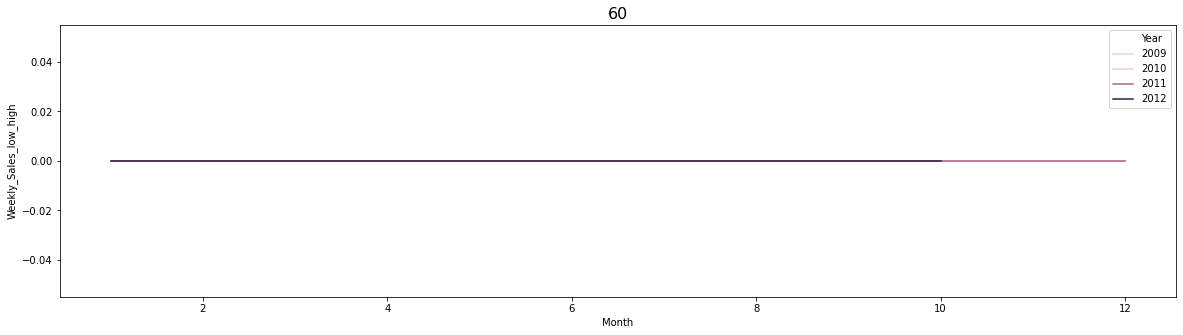

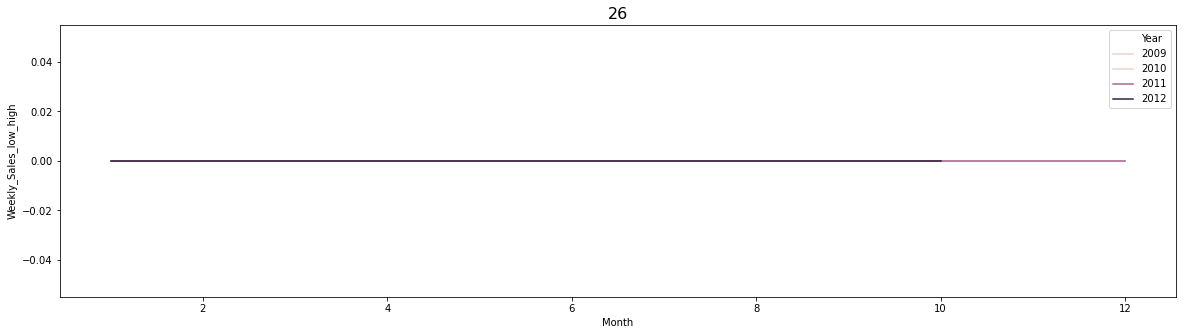

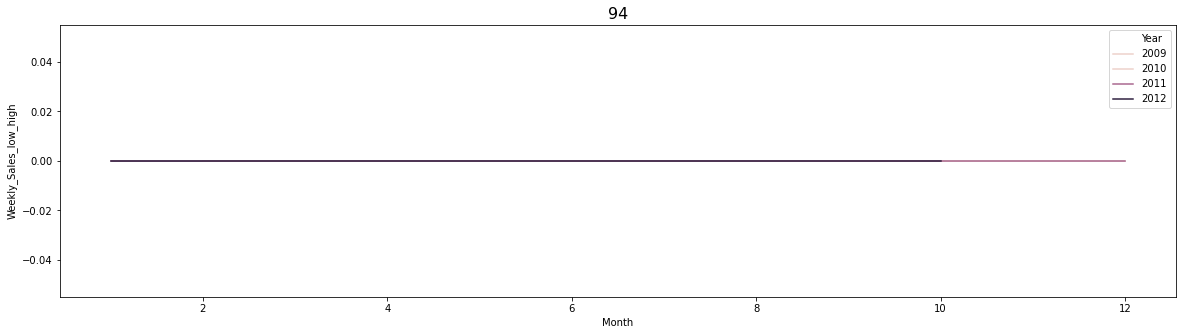

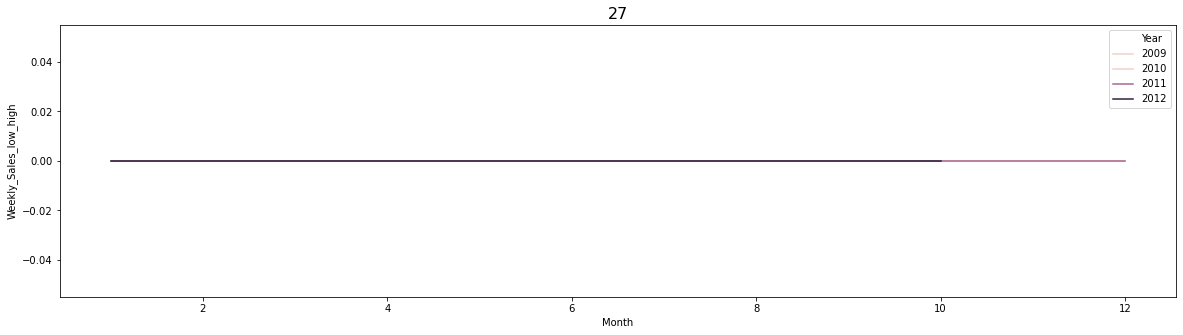

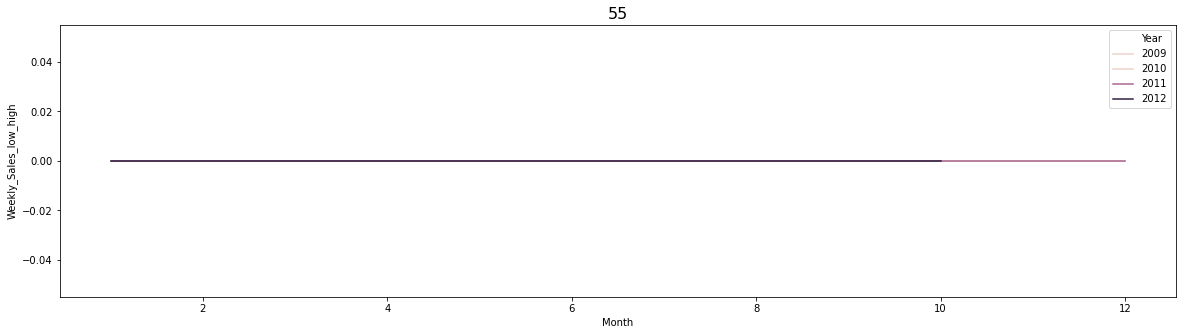

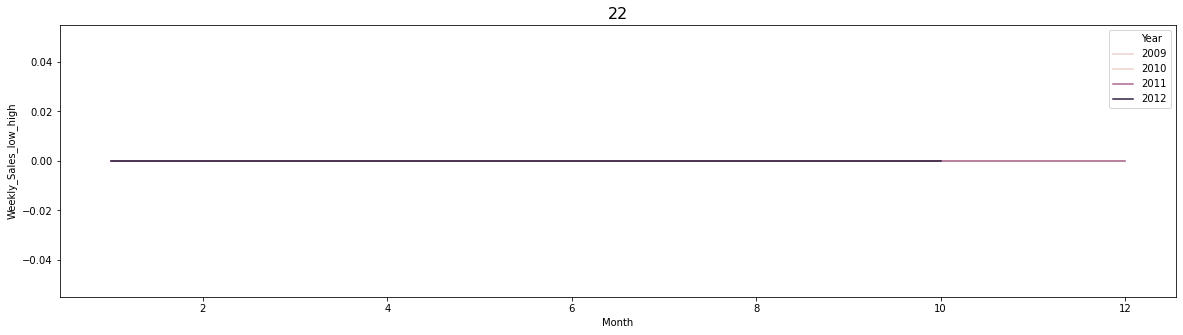

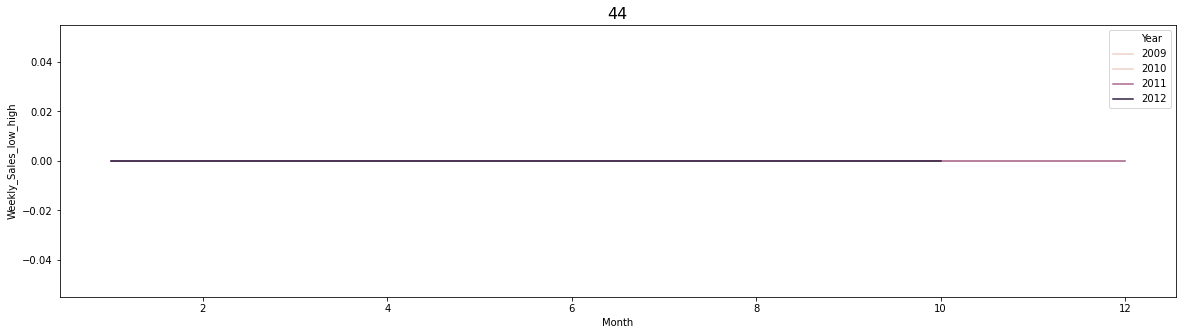

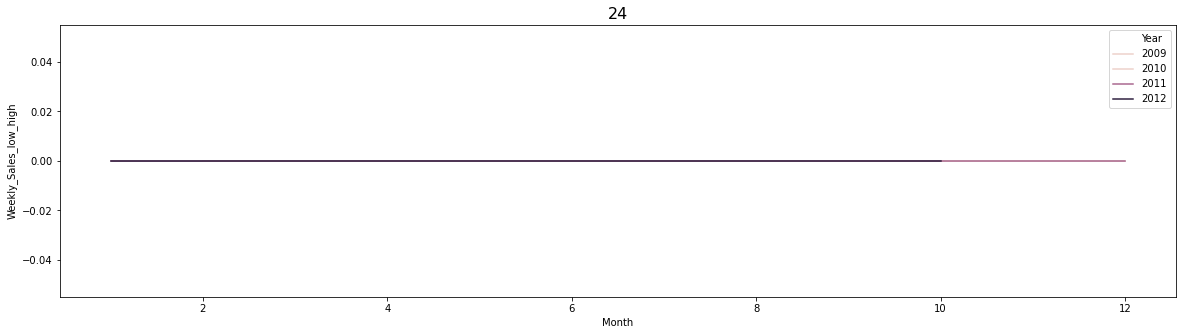

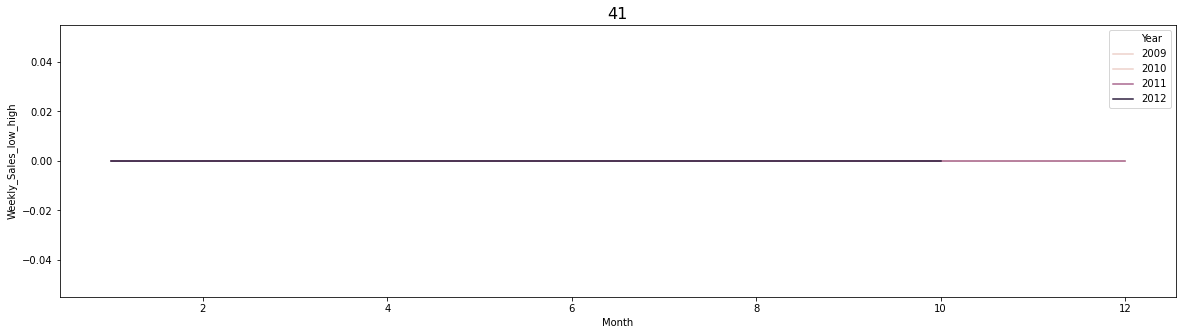

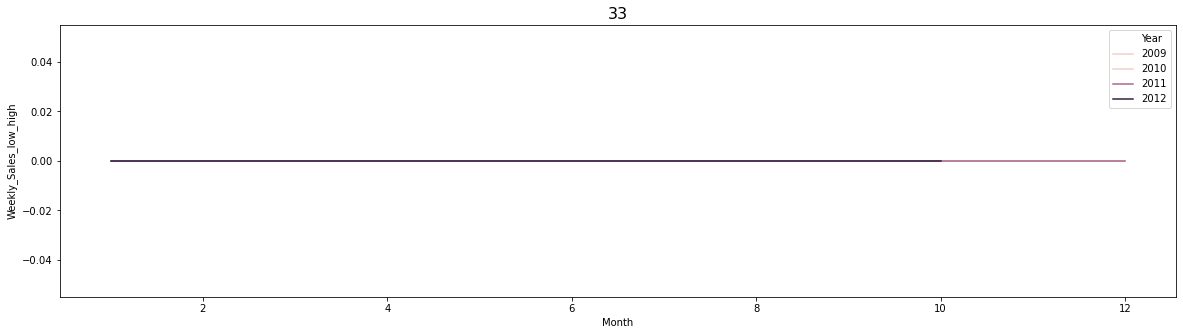

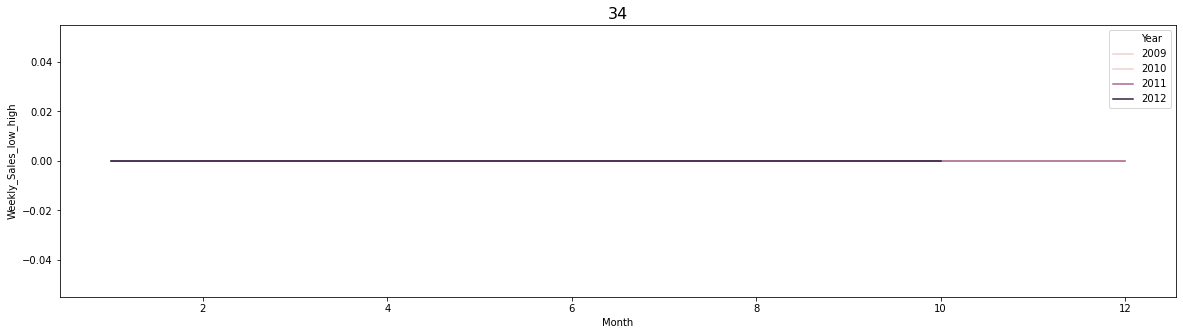

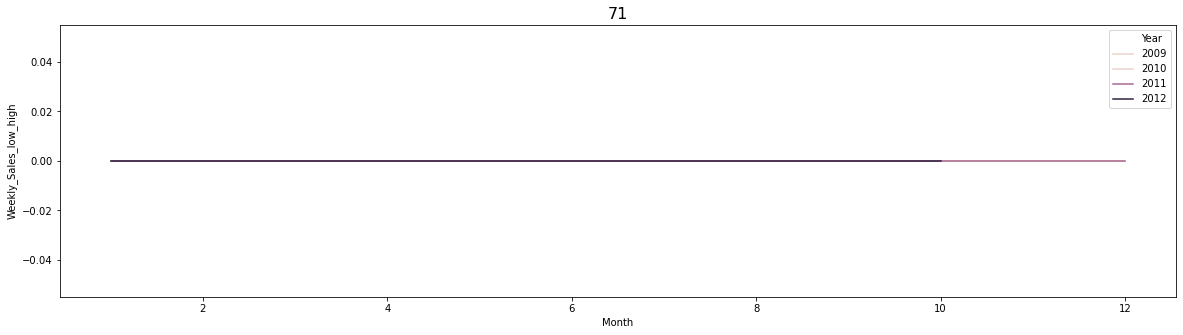

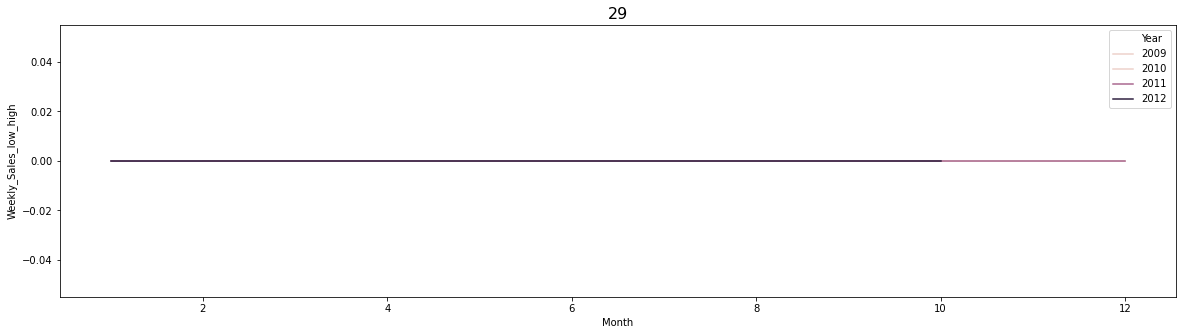

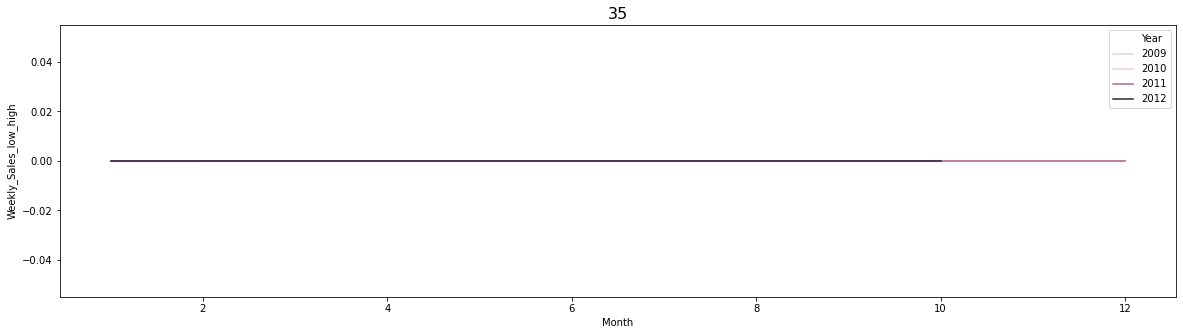

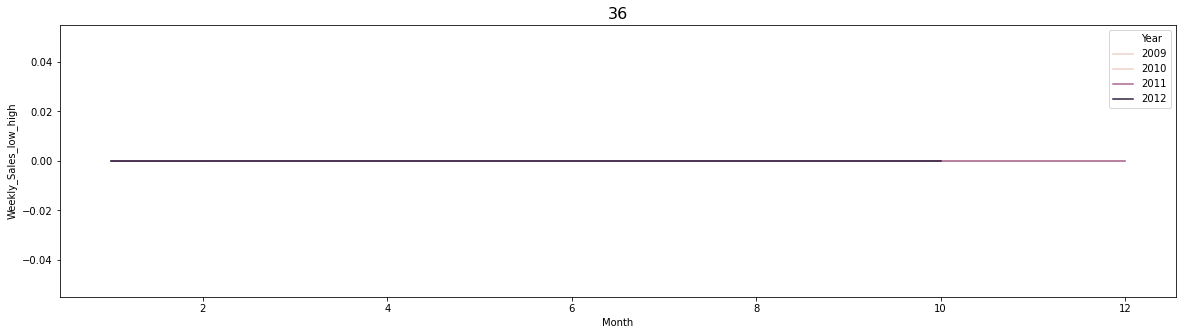

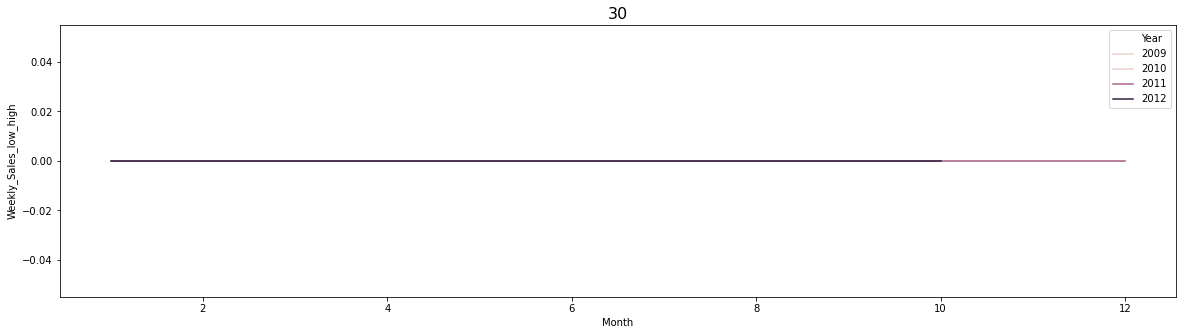

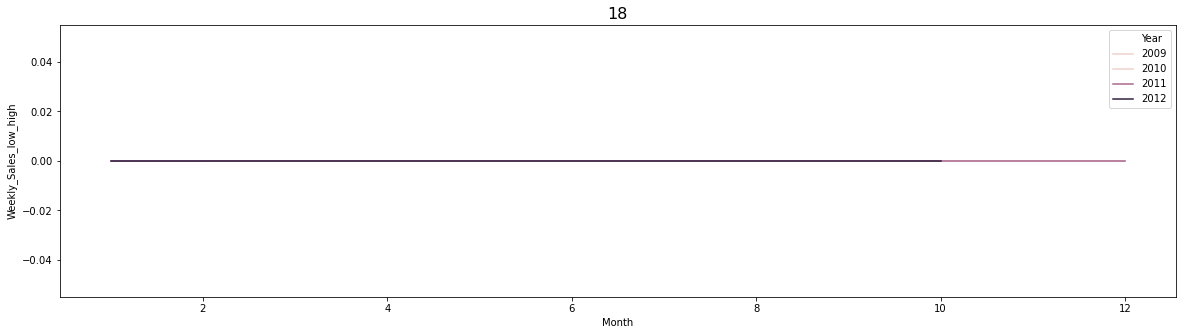

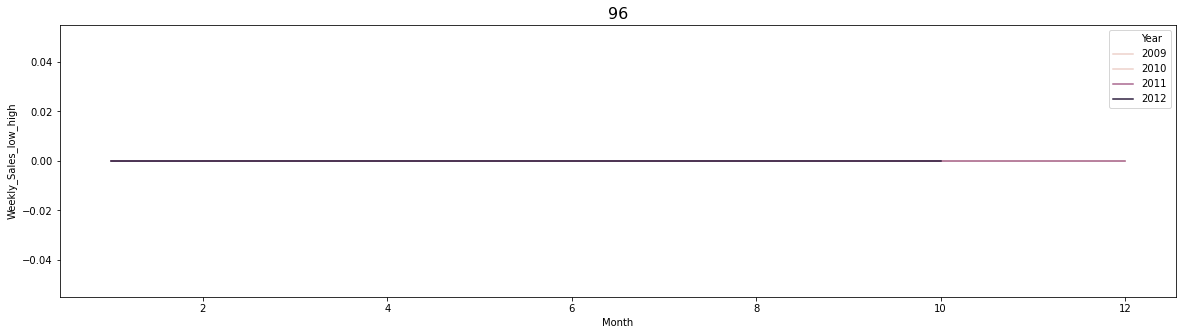

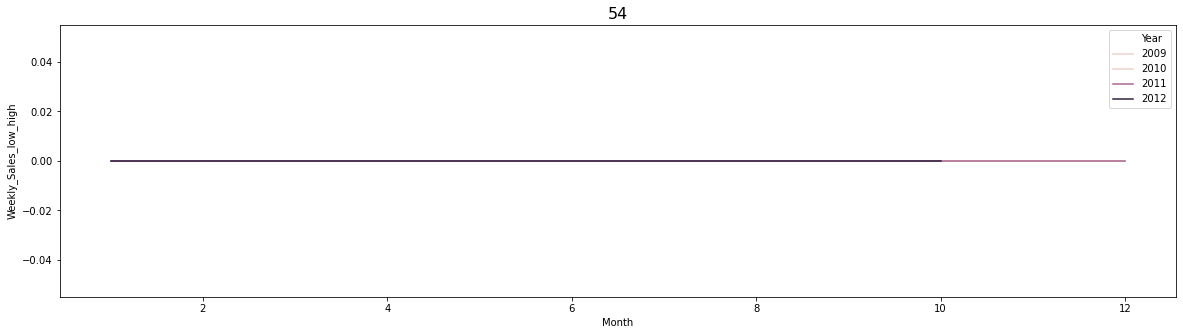

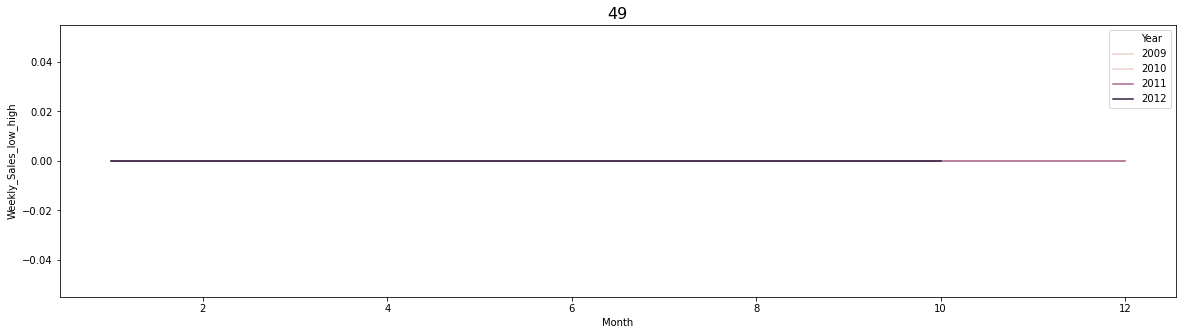

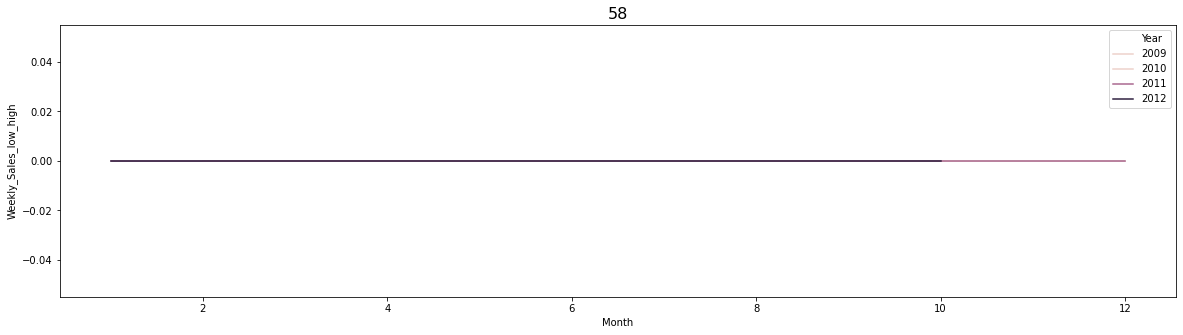

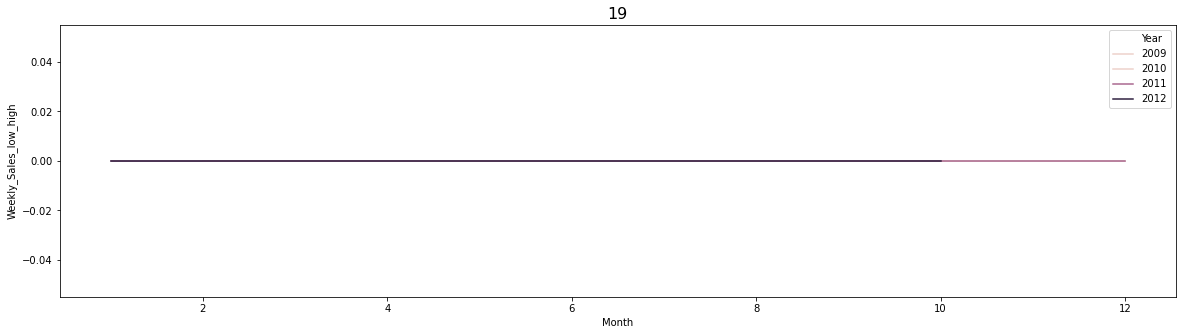

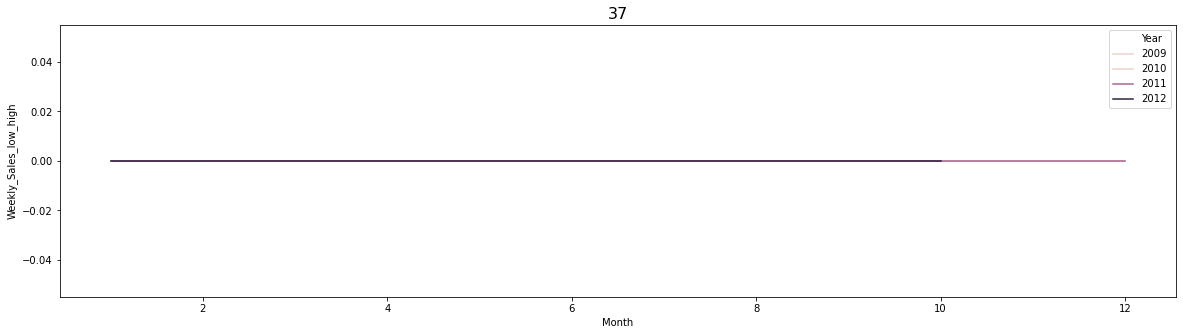

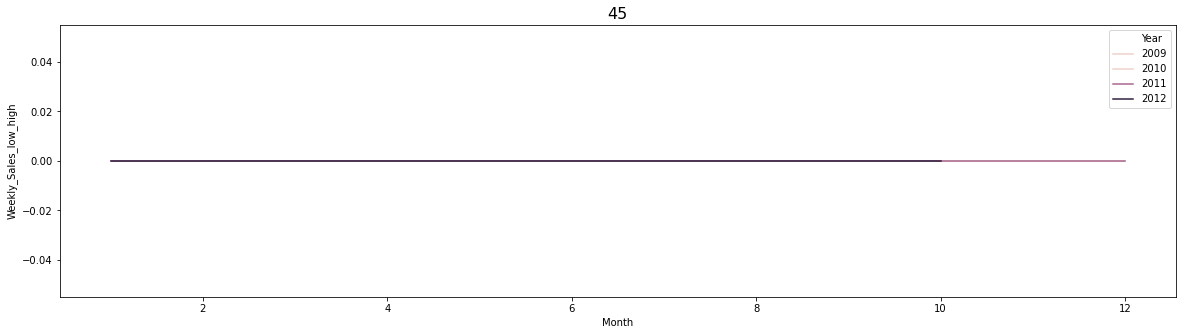

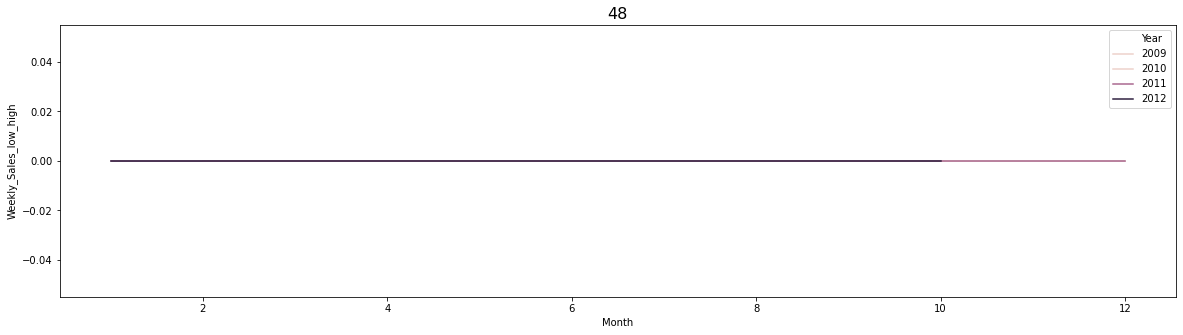

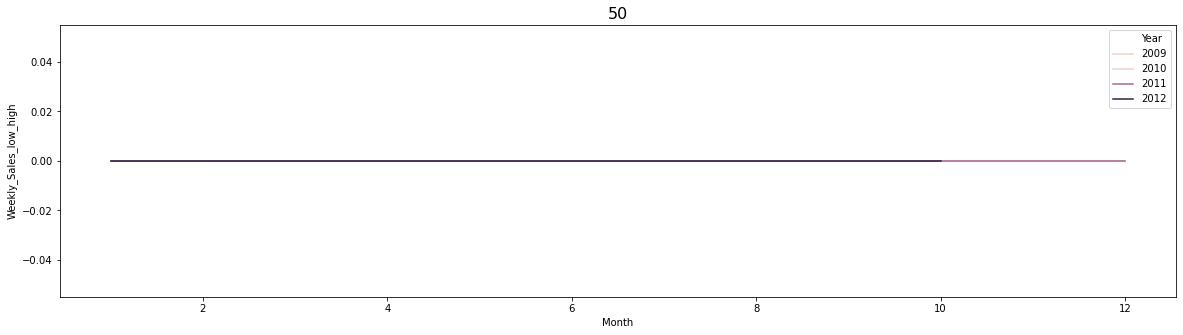

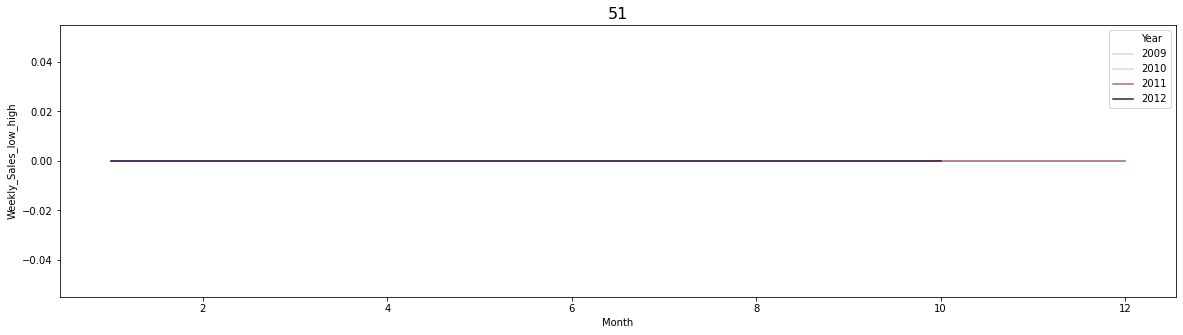

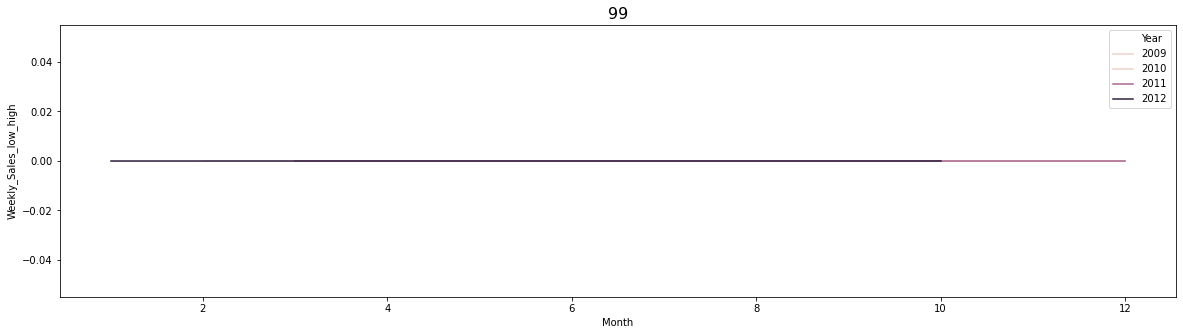

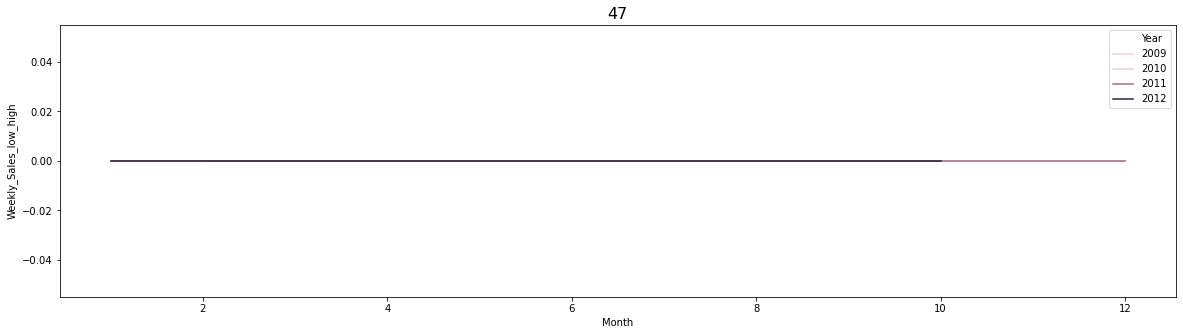

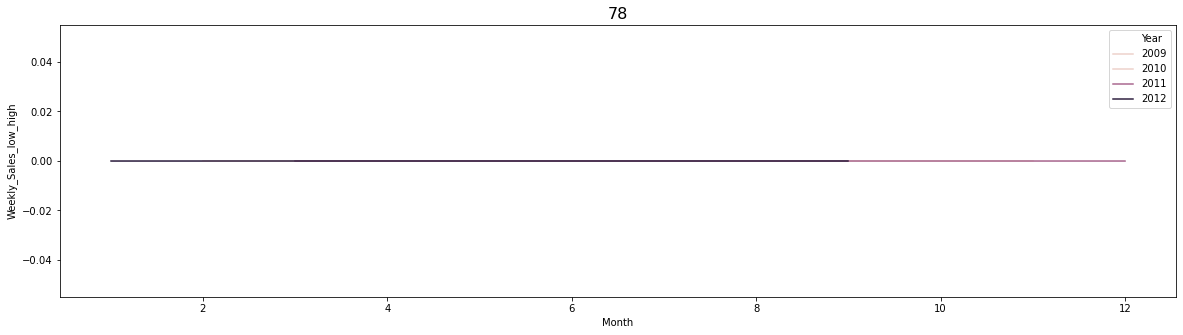

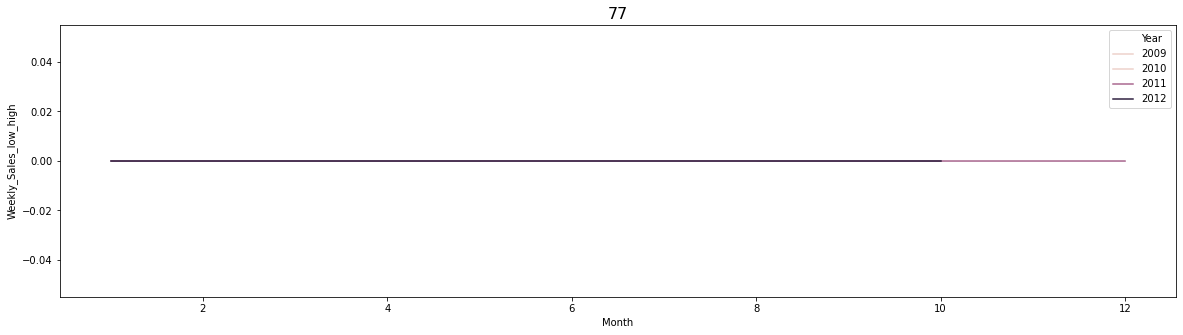

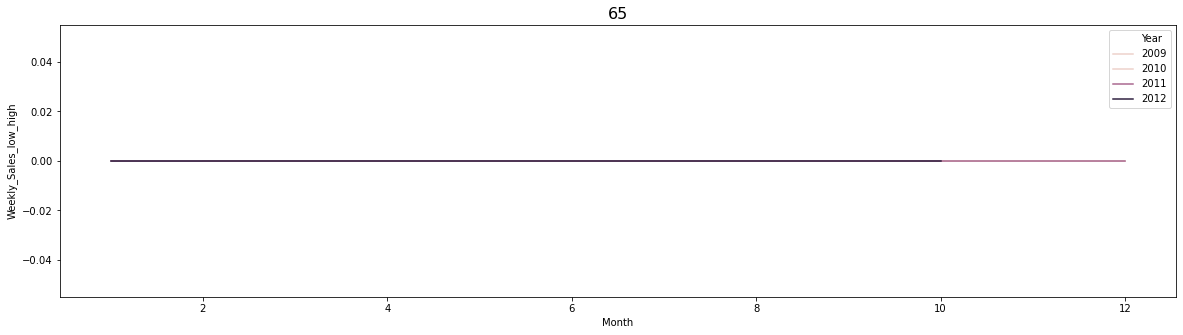

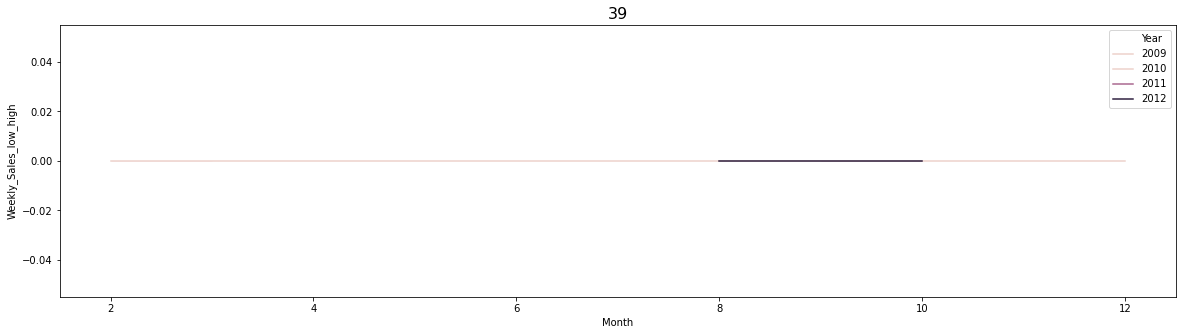

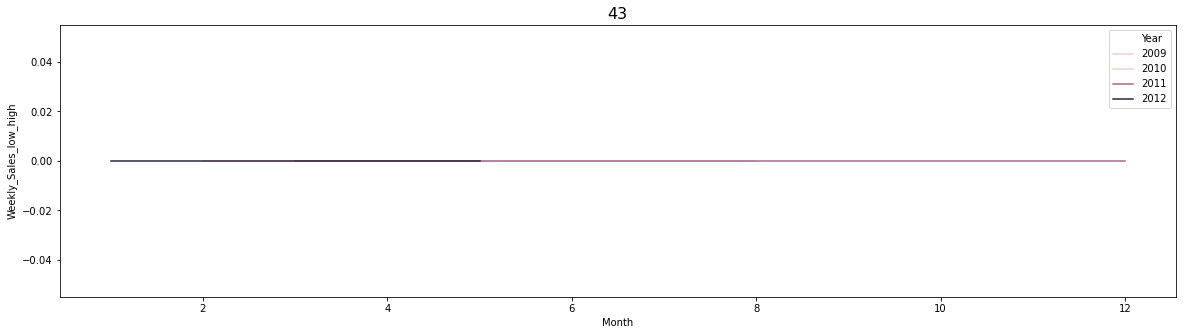

In [60]:
for i in range(len(dataset["Dept"].value_counts())):    
    plt.figure(figsize=(20,5))
    sns.lineplot(x="Month", y="Weekly_Sales_low_high", data=dataset[dataset["Dept"]==dataset["Dept"].value_counts().index[i]],hue="Year").set_title(dataset["Dept"].value_counts().index[i], fontsize=16)


Just Dept. 7 and  72 have extreme Week Sales for November, December, in the years 2009, 2010,2011, 2012.

# Label Encoding

In [61]:
#fill in mean for floats
for c in dataset.columns:
    if dataset[c].dtype=='float16' or  dataset[c].dtype=='float32' or  dataset[c].dtype=='float64':
        dataset[c].fillna(dataset[c].mean())

#fill in -999 for categoricals
dataset = dataset.fillna(-999)
# Label Encoding
for f in dataset.columns:
    if dataset[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(dataset[f].values))
        dataset[f] = lbl.transform(list(dataset[f].values))
        
print('Labelling done.') 

Labelling done.


In [62]:
#fill in mean for floats
for c in dataset_test.columns:
    if dataset_test[c].dtype=='float16' or  dataset_test[c].dtype=='float32' or  dataset_test[c].dtype=='float64':
        dataset_test[c].fillna(dataset_test[c].mean())

#fill in -999 for categoricals
dataset_test = dataset_test.fillna(-999)
# Label Encoding
for f in dataset_test.columns:
    if dataset_test[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(dataset_test[f].values))
        dataset_test[f] = lbl.transform(list(dataset_test[f].values))
        
print('Labelling done.') 

Labelling done.


# Simple Single Series Analysis by Store

In [63]:
dataset_ts = dataset.groupby(['Date','Store','Dept','CPI'])['Weekly_Sales'].sum().reset_index()
dataset_ts.shape

(421570, 5)

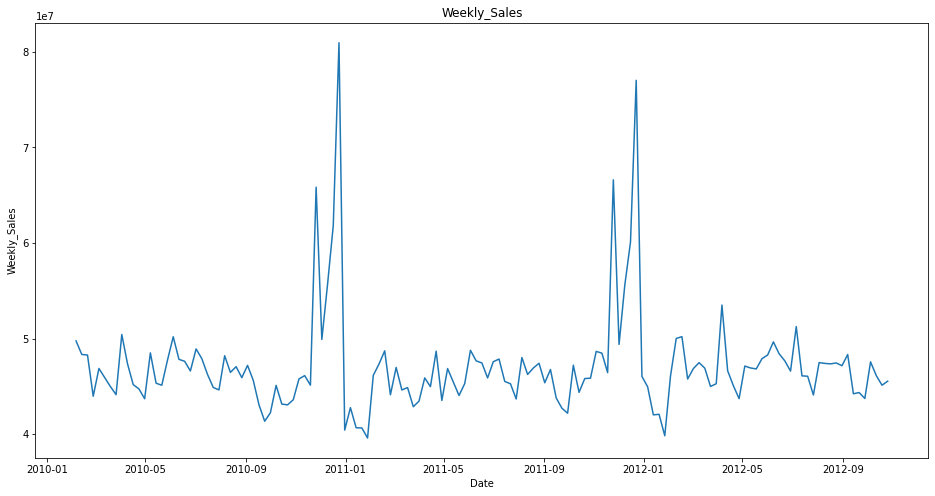

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=dataset_ts.groupby(["Date"])["Weekly_Sales"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.plot(ts);

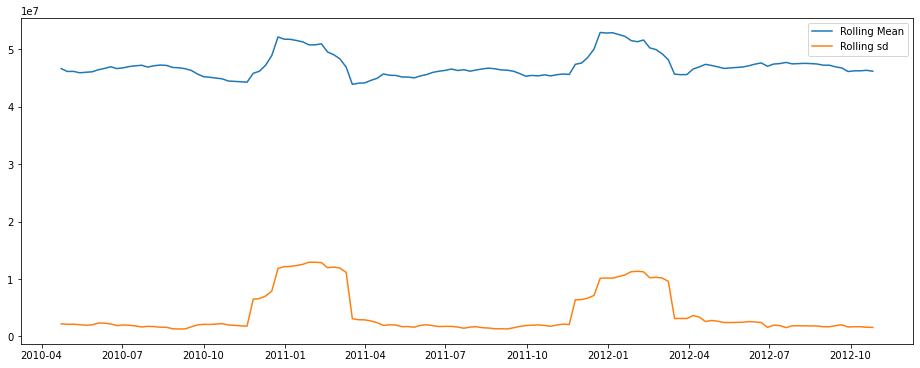

In [65]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

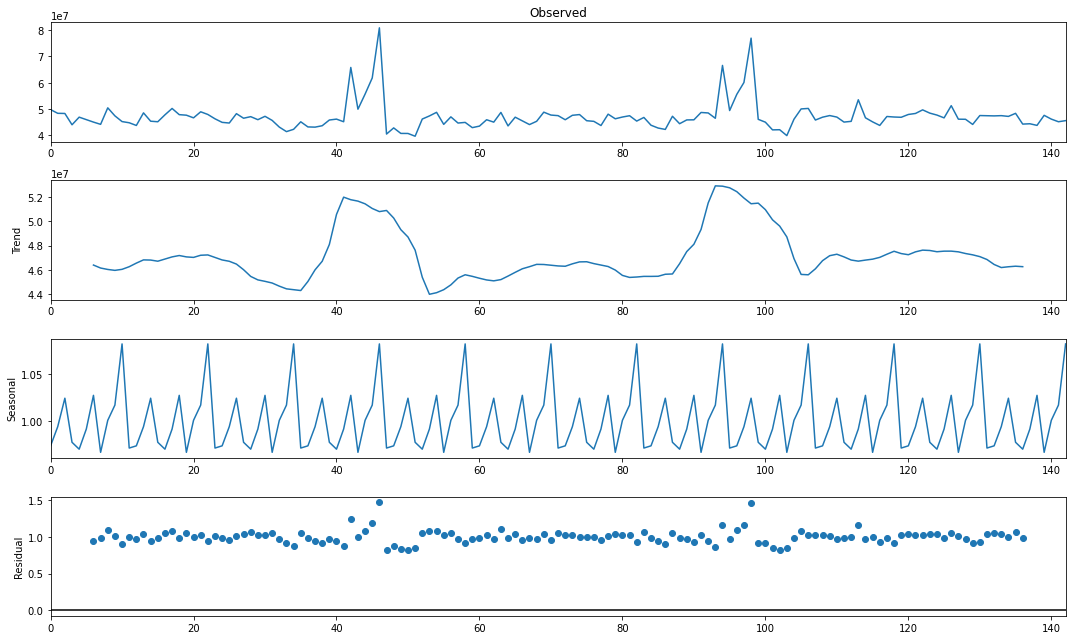

In [66]:
import statsmodels.api as sm
plt.rcParams["figure.figsize"] = (15,9)
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

Simple decomposition of time series.

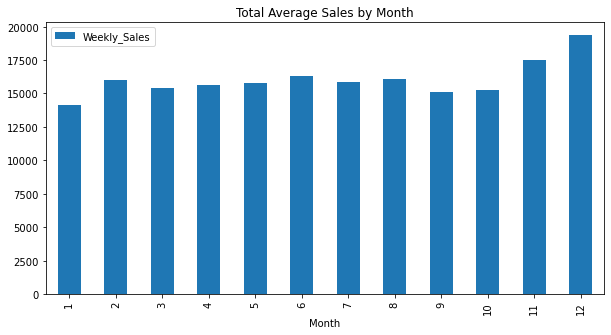

In [67]:
#Monthly growth
gouped_monthly = dataset.groupby('Month')['Weekly_Sales'].mean().T
# gouped_monthly
gouped_monthly.plot(kind='bar',title='Total Average Sales by Month',figsize=(10,5))
plt.legend(loc='best')
plt.show()

Sales by months - all Store

Time series forecast for store, STORE 1 example

In [68]:
dataset_store = dataset.groupby(['Date','Store','Dept','CPI'])['Weekly_Sales'].sum().reset_index()
Store1 = dataset_store[dataset_store.Store.isin([1])]

In [69]:
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
import scipy.stats as scs

X = Store1
size = int(len(X) * 0.90)
# limitCount = 100
train, test = X[0:size], X[size:len(X)]
history = [x for x in train.Weekly_Sales]

In [70]:
# !pip install pyramid-arima
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 679 kB/s 
     |████████████████████████████████| 2.1 MB 31.4 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.19
    Uninstalling Cython-0.29.19:
      Successfully uninstalled Cython-0.29.19


### Stationary TS

In [71]:
def stationary_test(df):
    # https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
    from statsmodels.tsa.stattools import adfuller
    print(" > Is the data stationary ?")
    dftest = adfuller(df, autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    print("\n > Is the de-trended data stationary ?")
    dftest = adfuller(df.dropna(), autolag='AIC')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
stationary_test(Store1.Weekly_Sales)

 > Is the data stationary ?
Test statistic = -26.238
P-value = 0.000
Critical values :
	1%: -3.4309910178169387 - The data is  stationary with 99% confidence
	5%: -2.8618232923676863 - The data is  stationary with 95% confidence
	10%: -2.5669207913841827 - The data is  stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -26.238
P-value = 0.000
Critical values :
	1%: -3.4309910178169387 - The data is  stationary with 99% confidence
	5%: -2.8618232923676863 - The data is  stationary with 95% confidence
	10%: -2.5669207913841827 - The data is  stationary with 90% confidence


# Auto Arima for Time Series Forecast


In [72]:
### Auto Arima 30 days OOS
# building the model
import pmdarima as pm
from pmdarima import auto_arima
model_ar = auto_arima(train.Weekly_Sales, trace=True, error_action='ignore', suppress_warnings=True)
model_ar.fit(train.Weekly_Sales)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=210889.503, BIC=210932.277, Time=5.462 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=214729.498, BIC=214743.756, Time=0.187 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=211603.471, BIC=211624.858, Time=0.370 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=212775.742, BIC=212797.129, Time=1.002 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=219149.665, BIC=219156.794, Time=0.130 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=211098.458, BIC=211134.103, Time=2.012 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=211087.463, BIC=211123.109, Time=2.047 seconds
Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=211109.529, BIC=211159.432, Time=6.347 seconds
Near non-invertible roots for order (3, 0, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(2,0,3)x(0,0,0,0) [in

ARIMA(order=(5, 0, 3), suppress_warnings=True)

In [73]:
forecast = model_ar.predict(n_periods=test.shape[0])

In [74]:
fig= go.Figure(data=
               [go.Scatter(x= test["Date"],
                           y= test["Weekly_Sales"],
                           name= "original", 
                           showlegend=True,
                           marker=dict(color="blue"))])
fig.add_trace(
    go.Scatter(x= test["Date"],
               y=forecast,
               name= "fitted values",
               showlegend= True, 
               marker=dict(color="red")))
fig.update_layout(
    title="Fitted values",
    xaxis_title="Dates",
    yaxis_title="Sales",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="#7f7f7f"
    ) )
fig.show()

The evaluation is based on Weighted Mean Absolute Error (WMAE), with a weight of 5 for Holiday Weeks and 1 otherwise


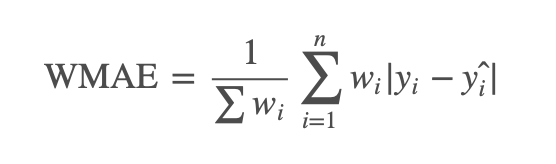


In [75]:
def wmae(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

In [76]:
%%time
# Validation

# all about rmsle https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113064
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

pred = []
for t in range(len(test)):
    model_ar_t = ARIMA(history, order=(5,0,1))
    model_fit = model_ar_t.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    pred.append(yhat)
    obs = test['Weekly_Sales'].iloc[t]
    history.append(obs)
    print('pred=%f, exp=%f' % (yhat, obs))

error_msetrain = mean_squared_error(test.Weekly_Sales, pred)
error_rmsle_train = rmsle(pred,error_msetrain)

print('Mean Squared Error: %.3f' % error_msetrain)
print('RMSLE: %.3f' % error_rmsle_train)

error_msetest = mean_squared_error(test.Weekly_Sales.values, pred)
error_rmsle_test = rmsle(pred,error_msetest)

print('Test MSE: %.3f' % error_msetest)
print('RMSLE: %.3f' % error_rmsle_test)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error_mape = mean_absolute_percentage_error(test.Weekly_Sales.values, np.array(pred))
print('Test MAPE: %.3f' % error_mape)

pred=22833.576019, exp=12584.610000
pred=17329.970908, exp=30048.550000
pred=28863.504184, exp=19375.380000
pred=16450.705376, exp=30588.780000
pred=31265.707045, exp=20460.800000
pred=17129.904417, exp=6158.120000
pred=20724.219944, exp=3022.950000
pred=5932.020538, exp=49906.280000
pred=32103.293835, exp=85585.760000
pred=49577.590656, exp=67204.170000
pred=61155.624657, exp=134590.450000
pred=82056.268674, exp=75292.570000
pred=64619.233234, exp=61193.950000
pred=63780.933561, exp=126861.490000
pred=65413.647158, exp=37535.690000
pred=53192.985578, exp=34958.100000
pred=40767.708313, exp=11847.910000
pred=9181.840358, exp=0.010000
pred=17467.794948, exp=15731.180000
pred=7384.881949, exp=45008.220000
pred=33321.694333, exp=22716.700000
pred=23471.681064, exp=35197.590000
pred=35236.532437, exp=14105.400000
pred=14022.047994, exp=2545.650000
pred=19340.041446, exp=17171.350000
pred=9060.312403, exp=36981.900000
pred=29935.963827, exp=22921.210000
pred=22583.042830, exp=30594.530000
p

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



pred=5172.290715, exp=4145.190000
pred=11022.152303, exp=3202.680000
pred=7757.468730, exp=4272.270000
pred=11892.191046, exp=6862.940000
pred=9765.468932, exp=8406.930000
pred=13736.299282, exp=11648.890000
pred=13504.560403, exp=2138.880000
pred=11596.246914, exp=1361.000000
pred=8902.318455, exp=3312.160000
pred=8325.157156, exp=85329.190000
pred=45367.768119, exp=59729.290000
pred=46426.609626, exp=432.610000
pred=33412.708260, exp=7839.200000
pred=6509.782516, exp=4762.950000
pred=9419.433242, exp=20254.830000
pred=17231.215142, exp=568.000000
pred=11142.541031, exp=11140.280000
pred=15603.241294, exp=1638.400000
pred=6445.687743, exp=8.000000
pred=11858.727003, exp=9556.520000
pred=8082.883432, exp=1508.820000
pred=11880.400591, exp=4355.000000
pred=9400.803172, exp=240.430000
pred=8282.385526, exp=1161.000000
pred=8298.376735, exp=5882.480000
pred=9696.148222, exp=2864.560000
pred=9931.215258, exp=40143.720000
pred=26100.412460, exp=12338.150000
pred=18448.135559, exp=45517.0700

NameError: name 'mean_squared_error' is not defined

### Forecast Arima

In [77]:
fig= go.Figure(data=
               [go.Scatter(x= test["Date"],
                           y= test["Weekly_Sales"],
                           name= "original", 
                           showlegend=True,
                           marker=dict(color="blue"))])
fig.add_trace(
    go.Scatter(x= test["Date"],
               y=pred,
               name= "fitted values",
               showlegend= True, 
               marker=dict(color="red")))
fig.update_layout(
    title="Fitted values",
    xaxis_title="Dates",
    yaxis_title="Sales",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="#7f7f7f"
    )
)
fig.show()

### Out of Sample Arima

In [78]:
forecastLimit=30 # 30 days oos
model_arima_oos = ARIMA(history, order=(5,0,3))
model_fit_oos = model_arima_oos.fit(disp=0)
output_oos = model_fit_oos.forecast(steps= forecastLimit)
predictions_oos = list(output_oos[0])

In [79]:
fig= go.Figure(data=
               [go.Scatter(x= test["Date"],
                           y= test["Weekly_Sales"],
                           name= "original", 
                           showlegend=True,
                           marker=dict(color="blue"))])
fig.add_trace(
    go.Scatter(x= test["Date"],
               y=predictions_oos,
               name= "fitted values",
               showlegend= True, 
               marker=dict(color="red")))
fig.update_layout(
    title="Fitted values",
    xaxis_title="Dates",
    yaxis_title="Sales",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="#7f7f7f"
    )
)
fig.show()

# Modeling

In [80]:
split_date = '2012-06-01'
data_train = dataset.loc[dataset.Date <= split_date].copy()
data_test = dataset.loc[dataset.Date > split_date].copy()

In [81]:
X_train, y_train = data_train[['Store', 'Size', 'Dept', 'Month', 'Year', 'IsHoliday', 'Temperature', 'Fuel_Price', 
          'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']], data_train['Weekly_Sales']

X_test, y_test = data_test[['Store', 'Size', 'Dept', 'Month', 'Year', 'IsHoliday', 'Temperature', 'Fuel_Price', 
          'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']], data_test['Weekly_Sales']

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((359432, 15), (359432,), (62138, 15), (62138,))

# Baseline Model

### XGBoost Model

In [82]:
reg = xgb.XGBRegressor(n_estimators=500)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

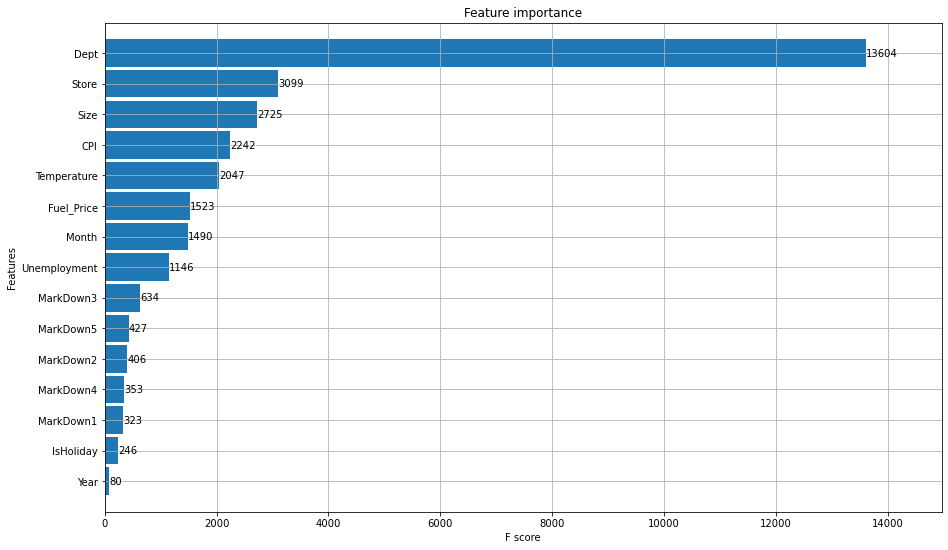

In [83]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(reg, height=0.9)

### Forecast on Test Set XGB Regressor

In [84]:
data_test['Weekly_Sales_pred'] = reg.predict(X_test)
dataset_all = pd.concat([data_test, data_train], sort=True)

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_squared_error(y_true=data_test['Weekly_Sales'],
                   y_pred=data_test['Weekly_Sales_pred'])

20140418.80112918

In [86]:
mean_absolute_error(y_true=data_test['Weekly_Sales'],
                   y_pred=data_test['Weekly_Sales_pred'])

2661.2943804118268

In [87]:
from statsmodels.tools.eval_measures import rmse
import datetime 
error=rmse(data_test['Weekly_Sales'],
                   data_test['Weekly_Sales_pred'])
error

4487.8077945840305

In [88]:
holiday_week_teste = data_train.IsHoliday.apply(lambda x: True if x else False)
wmae_xgb = wmae(data_test,data_test.Weekly_Sales, data_test.Weekly_Sales_pred)
wmae_xgb

2728.9

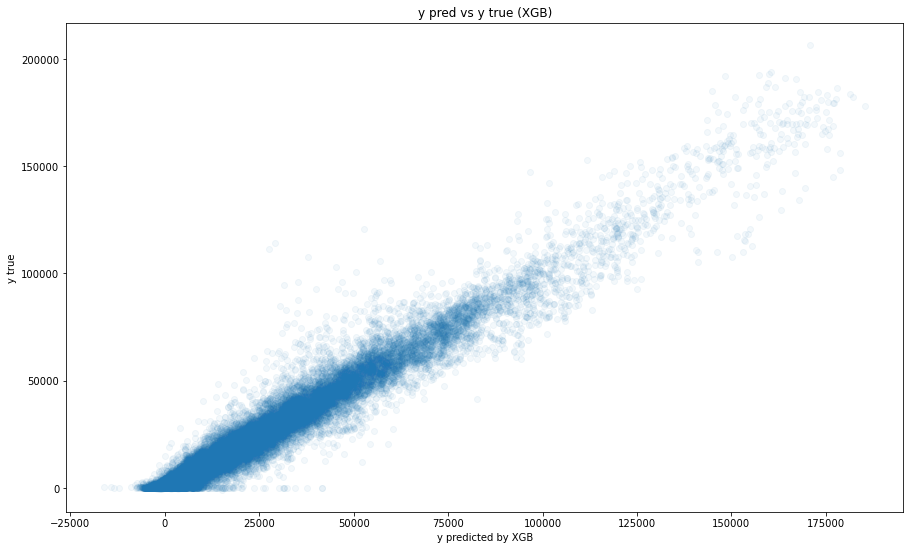

In [89]:
plt.scatter(data_test['Weekly_Sales_pred'], data_test['Weekly_Sales'], alpha = 0.05)
plt.xlabel("y predicted by XGB")
plt.ylabel("y true")
plt.title("y pred vs y true (XGB)")
plt.show()

### Forecast on Test Set Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=80, max_depth=35)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, n_estimators=80)

In [91]:
data_test['Weekly_Sales_pred_rf_ref'] = rf_reg.predict(X_test)
dataset_all = pd.concat([data_test, data_train], sort=True)

mean_absolute_error(y_true=data_test['Weekly_Sales'],
                   y_pred=data_test['Weekly_Sales_pred_rf_ref'])

1830.4201491175604

In [92]:
error_=rmse(data_test['Weekly_Sales'],
                   data_test['Weekly_Sales_pred_rf_ref'])
error_

3827.1176887001866

In [93]:
wmae_rfreg = wmae(data_test,data_test.Weekly_Sales, data_test.Weekly_Sales_pred_rf_ref)
wmae_rfreg

1862.02

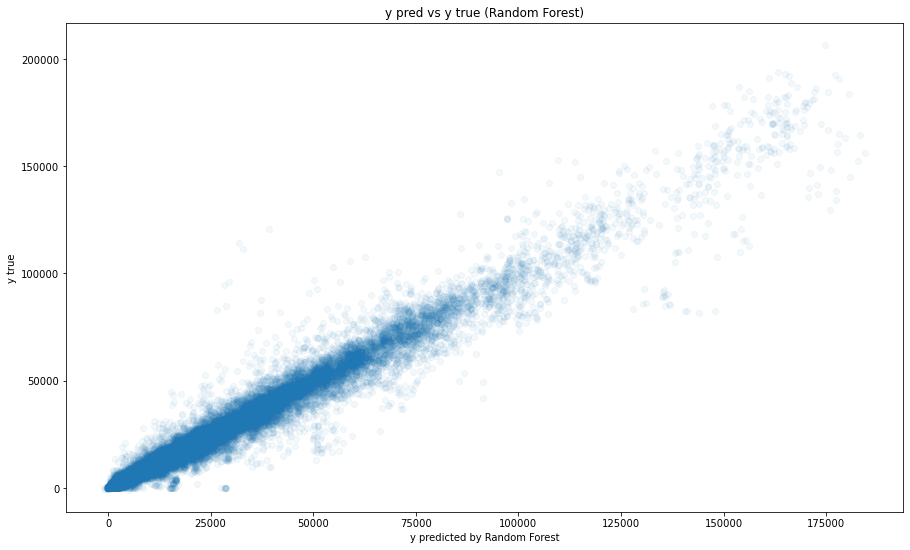

In [94]:
plt.scatter(data_test['Weekly_Sales_pred_rf_ref'], data_test['Weekly_Sales'], alpha = 0.05)
plt.xlabel("y predicted by Random Forest")
plt.ylabel("y true")
plt.title("y pred vs y true (Random Forest)")
plt.show()

### Baseline submission

In [95]:
predicted_test = rf_reg.predict(dataset_test[['Store','Size','Dept','Month','Year','IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']])

dataset_test['weeklySales'] = predicted_test
dataset_test['id'] = dataset_test['Store'].astype(str) + '_' +  dataset_test['Dept'].astype(str) + '_' +  dataset_test['Date'].astype(str)
dataset_test = dataset_test[['id', 'weeklySales']]
dataset_test = dataset_test.rename(columns={'id': 'Id', 'weeklySales': 'Weekly_Sales'})
dataset_test.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,20027.634500
1,1_1_2012-11-09,17636.741125
2,1_1_2012-11-16,18667.563625
3,1_1_2012-11-23,20158.925875
4,1_1_2012-11-30,18936.709625


In [96]:
dataset_test.to_csv('submission_baseline.csv', index=False)

# End notebook